In [ ]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np

def wrap(job,job_id,task_id):
    def singlerun(kaf,L,run):
        import numpy as np
        rng = GSLRandomNumberGenerator()
        rng.seed(run)
        rm = 0.005
        R=2*rm
        voxelr=rm*1.0208582  
        D = 1
        kd=4*math.pi*D
        ka = kaf*kd
        tm =(2*voxelr)**2/(6*D)
        N = 100
        H = 3*voxelr*2
        ori = Real3(0.5*H,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)        
        w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
        size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
        w.add_structure(Species('X'),PlanarSurface(ori,unit0,unit1))
        Nmv=size[1]*size[2]        
        Area=Nmv*(2*voxelr)**2
        #print('A',L*L,Area)
        C=float(N)/Area
        with species_attributes():
            A |  {'D': str(0), 'radius':str(voxelr),'location':'X'}
            B |  {'D': str(D), 'radius':str(voxelr),'location':'X'}

        with reaction_rules():#for spa and egfrd
            A + B > B | ka

        m2 = get_model()
        w.bind_to(m2)

        na=1
        w.add_molecules(Species('A'), na)
        w.add_molecules(Species('B'), N)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        simt=0
        while na==1:
            sim.step()
            na = w.num_particles_exact(Species('A'))
            simt=sim.t()
        return simt,C
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

kaf=10.
simrun=3000
Ls=[7,6,5,4,3.5,3,2.5,2,1]
#Ls=[10,9,8,0.8,0.5]
Ls=[7,3,1]
rxt=[]
conc=[]
for L in Ls:
    print('L',L)
    jobs=[{'kaf':kaf,'L':L}]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=350,path='tmp',modules=('numpy','ecell4','math'))[0]
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=350,modules=('numpy','ecell4','math'))[0]
    conc.append(res[0][1])
    rxt.append(np.mean([r[0] for r in res]))
print('finish') 

L 7


DEBUG:sge:Submitted batch job 1026377
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1026377_[1-3000%35      defq sge-f8n6     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 1026377 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1026377] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1026377_[353-3000%      defq sge-f8n6     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1026377_351      defq sge-f8n6     chew  R       0:00      1 ibc16
DEBUG:sge:       1026377_352      defq sge-f8n6     chew  R       0:00      1 ibc02
DEBUG:sge:       1026377_121      defq sge-f8n6     chew  R       0:09      1 ibc08
DEBUG:sge:       1026377_122      defq sge-f8n6     chew  R       0:09      1 ibc08
DEBUG:sge:       1026377_123      defq sge-f8n6     chew  R       0:09      1 ibc08
DEBUG:sge:       1026377_124      defq sge-f

DEBUG:sge:       1026377_211      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_212      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_213      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_214      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_215      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_216      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_217      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_218      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_219      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_220      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_221      defq sge-f8n6     chew  R       0:09      1 ibc15
DEBUG:sge:       1026377_222      defq sge-f8n6     chew  R       0:09      

DEBUG:sge:       1026377_310      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_311      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_312      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_313      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_314      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_315      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_316      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_317      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_318      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_319      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_320      defq sge-f8n6     chew  R       0:09      1 ibc21
DEBUG:sge:       1026377_321      defq sge-f8n6     chew  R       0:09      

DEBUG:sge:        1026377_59      defq sge-f8n6     chew  R       0:10      1 ibc04
DEBUG:sge:        1026377_60      defq sge-f8n6     chew  R       0:10      1 ibc04
DEBUG:sge:        1026377_61      defq sge-f8n6     chew  R       0:10      1 ibc04
DEBUG:sge:        1026377_62      defq sge-f8n6     chew  R       0:10      1 ibc04
DEBUG:sge:        1026377_63      defq sge-f8n6     chew  R       0:10      1 ibc04
DEBUG:sge:        1026377_64      defq sge-f8n6     chew  R       0:10      1 ibc04
DEBUG:sge:        1026377_65      defq sge-f8n6     chew  R       0:10      1 ibc05
DEBUG:sge:        1026377_66      defq sge-f8n6     chew  R       0:10      1 ibc05
DEBUG:sge:        1026377_67      defq sge-f8n6     chew  R       0:10      1 ibc05
DEBUG:sge:        1026377_68      defq sge-f8n6     chew  R       0:10      1 ibc05
DEBUG:sge:        1026377_69      defq sge-f8n6     chew  R       0:10      1 ibc05
DEBUG:sge:        1026377_70      defq sge-f8n6     chew  R       0:10      

DEBUG:sge:       1026377_362      defq sge-f8n6     chew  R       0:08      1 ibc14
DEBUG:sge:       1026377_363      defq sge-f8n6     chew  R       0:08      1 ibc14
DEBUG:sge:       1026377_357      defq sge-f8n6     chew  R       0:09      1 ibc13
DEBUG:sge:       1026377_358      defq sge-f8n6     chew  R       0:09      1 ibc01
DEBUG:sge:       1026377_359      defq sge-f8n6     chew  R       0:09      1 ibc01
DEBUG:sge:       1026377_360      defq sge-f8n6     chew  R       0:09      1 ibc01
DEBUG:sge:       1026377_361      defq sge-f8n6     chew  R       0:09      1 ibc04
DEBUG:sge:       1026377_353      defq sge-f8n6     chew  R       0:10      1 ibc15
DEBUG:sge:       1026377_354      defq sge-f8n6     chew  R       0:10      1 ibc15
DEBUG:sge:       1026377_355      defq sge-f8n6     chew  R       0:10      1 ibc15
DEBUG:sge:       1026377_356      defq sge-f8n6     chew  R       0:10      1 ibc03
DEBUG:sge:       1026377_351      defq sge-f8n6     chew  R       0:11      

DEBUG:sge:       1026377_218      defq sge-f8n6     chew  R       0:20      1 ibc15
DEBUG:sge:       1026377_219      defq sge-f8n6     chew  R       0:20      1 ibc15
DEBUG:sge:       1026377_221      defq sge-f8n6     chew  R       0:20      1 ibc15
DEBUG:sge:       1026377_222      defq sge-f8n6     chew  R       0:20      1 ibc15
DEBUG:sge:       1026377_225      defq sge-f8n6     chew  R       0:20      1 ibc16
DEBUG:sge:       1026377_226      defq sge-f8n6     chew  R       0:20      1 ibc16
DEBUG:sge:       1026377_227      defq sge-f8n6     chew  R       0:20      1 ibc16
DEBUG:sge:       1026377_228      defq sge-f8n6     chew  R       0:20      1 ibc16
DEBUG:sge:       1026377_229      defq sge-f8n6     chew  R       0:20      1 ibc16
DEBUG:sge:       1026377_230      defq sge-f8n6     chew  R       0:20      1 ibc16
DEBUG:sge:       1026377_231      defq sge-f8n6     chew  R       0:20      1 ibc16
DEBUG:sge:       1026377_232      defq sge-f8n6     chew  R       0:20      

DEBUG:sge:       1026377_332      defq sge-f8n6     chew  R       0:20      1 ibc22
DEBUG:sge:       1026377_333      defq sge-f8n6     chew  R       0:20      1 ibc22
DEBUG:sge:       1026377_334      defq sge-f8n6     chew  R       0:20      1 ibc22
DEBUG:sge:       1026377_335      defq sge-f8n6     chew  R       0:20      1 ibc22
DEBUG:sge:       1026377_336      defq sge-f8n6     chew  R       0:20      1 ibc22
DEBUG:sge:       1026377_337      defq sge-f8n6     chew  R       0:20      1 ibc23
DEBUG:sge:       1026377_338      defq sge-f8n6     chew  R       0:20      1 ibc23
DEBUG:sge:       1026377_340      defq sge-f8n6     chew  R       0:20      1 ibc23
DEBUG:sge:       1026377_341      defq sge-f8n6     chew  R       0:20      1 ibc23
DEBUG:sge:       1026377_342      defq sge-f8n6     chew  R       0:20      1 ibc23
DEBUG:sge:       1026377_343      defq sge-f8n6     chew  R       0:20      1 ibc23
DEBUG:sge:       1026377_344      defq sge-f8n6     chew  R       0:20      

DEBUG:sge:        1026377_94      defq sge-f8n6     chew  R       0:21      1 ibc06
DEBUG:sge:        1026377_95      defq sge-f8n6     chew  R       0:21      1 ibc06
DEBUG:sge:        1026377_96      defq sge-f8n6     chew  R       0:21      1 ibc06
DEBUG:sge:        1026377_97      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:        1026377_98      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:        1026377_99      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:       1026377_100      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:       1026377_101      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:       1026377_102      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:       1026377_103      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:       1026377_104      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:       1026377_105      defq sge-f8n6     chew  R       0:21      

DEBUG:sge:       1026377_131      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_132      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_134      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_135      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_136      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_137      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_138      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_139      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_140      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_141      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_142      defq sge-f8n6     chew  R       0:30      1 ibc10
DEBUG:sge:       1026377_143      defq sge-f8n6     chew  R       0:30      

DEBUG:sge:       1026377_253      defq sge-f8n6     chew  R       0:30      1 ibc17
DEBUG:sge:       1026377_254      defq sge-f8n6     chew  R       0:30      1 ibc17
DEBUG:sge:       1026377_255      defq sge-f8n6     chew  R       0:30      1 ibc17
DEBUG:sge:       1026377_257      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_260      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_261      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_262      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_263      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_264      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_265      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_267      defq sge-f8n6     chew  R       0:30      1 ibc18
DEBUG:sge:       1026377_268      defq sge-f8n6     chew  R       0:30      

DEBUG:sge:        1026377_18      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_19      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_20      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_22      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_23      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_24      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_25      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_26      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_27      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_28      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_29      defq sge-f8n6     chew  R       0:31      1 ibc02
DEBUG:sge:        1026377_30      defq sge-f8n6     chew  R       0:31      

DEBUG:sge:       1026377_414      defq sge-f8n6     chew  R       0:09      1 ibc14
DEBUG:sge:       1026377_415      defq sge-f8n6     chew  R       0:09      1 ibc02
DEBUG:sge:       1026377_416      defq sge-f8n6     chew  R       0:09      1 ibc07
DEBUG:sge:       1026377_417      defq sge-f8n6     chew  R       0:09      1 ibc03
DEBUG:sge:       1026377_418      defq sge-f8n6     chew  R       0:09      1 ibc16
DEBUG:sge:       1026377_412      defq sge-f8n6     chew  R       0:10      1 ibc08
DEBUG:sge:       1026377_410      defq sge-f8n6     chew  R       0:11      1 ibc10
DEBUG:sge:       1026377_411      defq sge-f8n6     chew  R       0:11      1 ibc03
DEBUG:sge:       1026377_409      defq sge-f8n6     chew  R       0:12      1 ibc03
DEBUG:sge:       1026377_408      defq sge-f8n6     chew  R       0:14      1 ibc07
DEBUG:sge:       1026377_407      defq sge-f8n6     chew  R       0:15      1 ibc03
DEBUG:sge:       1026377_403      defq sge-f8n6     chew  R       0:16      

DEBUG:sge:       1026377_161      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_162      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_163      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_164      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_165      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_166      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_167      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_168      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_169      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_170      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_171      defq sge-f8n6     chew  R       0:40      1 ibc12
DEBUG:sge:       1026377_172      defq sge-f8n6     chew  R       0:40      

DEBUG:sge:       1026377_286      defq sge-f8n6     chew  R       0:40      1 ibc19
DEBUG:sge:       1026377_287      defq sge-f8n6     chew  R       0:40      1 ibc19
DEBUG:sge:       1026377_288      defq sge-f8n6     chew  R       0:40      1 ibc19
DEBUG:sge:       1026377_290      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_291      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_293      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_294      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_297      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_298      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_299      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_300      defq sge-f8n6     chew  R       0:40      1 ibc20
DEBUG:sge:       1026377_301      defq sge-f8n6     chew  R       0:40      

DEBUG:sge:        1026377_69      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_70      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_71      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_72      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_73      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_74      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_75      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_76      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_77      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_78      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_79      defq sge-f8n6     chew  R       0:41      1 ibc05
DEBUG:sge:        1026377_80      defq sge-f8n6     chew  R       0:41      

DEBUG:sge:       1026377_383      defq sge-f8n6     chew  R       0:35      1 ibc12
DEBUG:sge:       1026377_384      defq sge-f8n6     chew  R       0:35      1 ibc03
DEBUG:sge:       1026377_385      defq sge-f8n6     chew  R       0:35      1 ibc18
DEBUG:sge:       1026377_386      defq sge-f8n6     chew  R       0:35      1 ibc03
DEBUG:sge:       1026377_387      defq sge-f8n6     chew  R       0:35      1 ibc16
DEBUG:sge:       1026377_388      defq sge-f8n6     chew  R       0:35      1 ibc06
DEBUG:sge:       1026377_377      defq sge-f8n6     chew  R       0:36      1 ibc03
DEBUG:sge:       1026377_378      defq sge-f8n6     chew  R       0:36      1 ibc03
DEBUG:sge:       1026377_379      defq sge-f8n6     chew  R       0:36      1 ibc20
DEBUG:sge:       1026377_380      defq sge-f8n6     chew  R       0:36      1 ibc19
DEBUG:sge:       1026377_381      defq sge-f8n6     chew  R       0:36      1 ibc16
DEBUG:sge:       1026377_382      defq sge-f8n6     chew  R       0:36      

DEBUG:sge:       1026377_197      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_199      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_200      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_201      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_203      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_205      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_206      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_207      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_208      defq sge-f8n6     chew  R       0:51      1 ibc14
DEBUG:sge:       1026377_209      defq sge-f8n6     chew  R       0:51      1 ibc15
DEBUG:sge:       1026377_210      defq sge-f8n6     chew  R       0:51      1 ibc15
DEBUG:sge:       1026377_212      defq sge-f8n6     chew  R       0:51      

DEBUG:sge:       1026377_326      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_327      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_328      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_329      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_331      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_332      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_333      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_334      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_335      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_336      defq sge-f8n6     chew  R       0:51      1 ibc22
DEBUG:sge:       1026377_337      defq sge-f8n6     chew  R       0:51      1 ibc23
DEBUG:sge:       1026377_338      defq sge-f8n6     chew  R       0:51      

DEBUG:sge:       1026377_109      defq sge-f8n6     chew  R       0:52      1 ibc07
DEBUG:sge:       1026377_111      defq sge-f8n6     chew  R       0:52      1 ibc07
DEBUG:sge:       1026377_112      defq sge-f8n6     chew  R       0:52      1 ibc07
DEBUG:sge:       1026377_113      defq sge-f8n6     chew  R       0:52      1 ibc08
DEBUG:sge:       1026377_114      defq sge-f8n6     chew  R       0:52      1 ibc08
DEBUG:sge:       1026377_115      defq sge-f8n6     chew  R       0:52      1 ibc08
DEBUG:sge:       1026377_116      defq sge-f8n6     chew  R       0:52      1 ibc08
DEBUG:sge:       1026377_119      defq sge-f8n6     chew  R       0:52      1 ibc08
DEBUG:sge:
INFO:sge:Job 1026377 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1026377] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1026377_[442-3000%      defq sge-f8n6     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:       1026377_354      defq sge-f8n6     chew  R       0:51      1 ibc15
DEBUG:sge:       1026377_355      defq sge-f8n6     chew  R       0:51      1 ibc15
DEBUG:sge:       1026377_356      defq sge-f8n6     chew  R       0:51      1 ibc03
DEBUG:sge:       1026377_351      defq sge-f8n6     chew  R       0:52      1 ibc16
DEBUG:sge:       1026377_352      defq sge-f8n6     chew  R       0:52      1 ibc02
DEBUG:sge:       1026377_121      defq sge-f8n6     chew  R       1:01      1 ibc08
DEBUG:sge:       1026377_122      defq sge-f8n6     chew  R       1:01      1 ibc08
DEBUG:sge:       1026377_125      defq sge-f8n6     chew  R       1:01      1 ibc08
DEBUG:sge:       1026377_126      defq sge-f8n6     chew  R       1:01      1 ibc08
DEBUG:sge:       1026377_127      defq sge-f8n6     chew  R       1:01      1 ibc08
DEBUG:sge:       1026377_128      defq sge-f8n6     chew  R       1:01      1 ibc08
DEBUG:sge:       1026377_129      defq sge-f8n6     chew  R       1:01      

DEBUG:sge:       1026377_249      defq sge-f8n6     chew  R       1:01      1 ibc17
DEBUG:sge:       1026377_250      defq sge-f8n6     chew  R       1:01      1 ibc17
DEBUG:sge:       1026377_251      defq sge-f8n6     chew  R       1:01      1 ibc17
DEBUG:sge:       1026377_252      defq sge-f8n6     chew  R       1:01      1 ibc17
DEBUG:sge:       1026377_253      defq sge-f8n6     chew  R       1:01      1 ibc17
DEBUG:sge:       1026377_254      defq sge-f8n6     chew  R       1:01      1 ibc17
DEBUG:sge:       1026377_255      defq sge-f8n6     chew  R       1:01      1 ibc17
DEBUG:sge:       1026377_257      defq sge-f8n6     chew  R       1:01      1 ibc18
DEBUG:sge:       1026377_260      defq sge-f8n6     chew  R       1:01      1 ibc18
DEBUG:sge:       1026377_261      defq sge-f8n6     chew  R       1:01      1 ibc18
DEBUG:sge:       1026377_262      defq sge-f8n6     chew  R       1:01      1 ibc18
DEBUG:sge:       1026377_263      defq sge-f8n6     chew  R       1:01      

DEBUG:sge:        1026377_26      defq sge-f8n6     chew  R       1:02      1 ibc02
DEBUG:sge:        1026377_27      defq sge-f8n6     chew  R       1:02      1 ibc02
DEBUG:sge:        1026377_28      defq sge-f8n6     chew  R       1:02      1 ibc02
DEBUG:sge:        1026377_29      defq sge-f8n6     chew  R       1:02      1 ibc02
DEBUG:sge:        1026377_30      defq sge-f8n6     chew  R       1:02      1 ibc02
DEBUG:sge:        1026377_31      defq sge-f8n6     chew  R       1:02      1 ibc02
DEBUG:sge:        1026377_42      defq sge-f8n6     chew  R       1:02      1 ibc03
DEBUG:sge:        1026377_45      defq sge-f8n6     chew  R       1:02      1 ibc03
DEBUG:sge:        1026377_49      defq sge-f8n6     chew  R       1:02      1 ibc04
DEBUG:sge:        1026377_50      defq sge-f8n6     chew  R       1:02      1 ibc04
DEBUG:sge:        1026377_51      defq sge-f8n6     chew  R       1:02      1 ibc04
DEBUG:sge:        1026377_52      defq sge-f8n6     chew  R       1:02      

DEBUG:sge:       1026377_446      defq sge-f8n6     chew  R       0:06      1 ibc21
DEBUG:sge:       1026377_442      defq sge-f8n6     chew  R       0:07      1 ibc01
DEBUG:sge:       1026377_443      defq sge-f8n6     chew  R       0:07      1 ibc03
DEBUG:sge:       1026377_441      defq sge-f8n6     chew  R       0:15      1 ibc03
DEBUG:sge:       1026377_440      defq sge-f8n6     chew  R       0:17      1 ibc16
DEBUG:sge:       1026377_439      defq sge-f8n6     chew  R       0:18      1 ibc03
DEBUG:sge:       1026377_437      defq sge-f8n6     chew  R       0:20      1 ibc15
DEBUG:sge:       1026377_438      defq sge-f8n6     chew  R       0:20      1 ibc05
DEBUG:sge:       1026377_435      defq sge-f8n6     chew  R       0:22      1 ibc14
DEBUG:sge:       1026377_433      defq sge-f8n6     chew  R       0:23      1 ibc06
DEBUG:sge:       1026377_434      defq sge-f8n6     chew  R       0:23      1 ibc03
DEBUG:sge:       1026377_431      defq sge-f8n6     chew  R       0:26      

DEBUG:sge:       1026377_134      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_135      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_136      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_138      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_139      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_140      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_141      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_143      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_144      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_145      defq sge-f8n6     chew  R       1:11      1 ibc11
DEBUG:sge:       1026377_146      defq sge-f8n6     chew  R       1:11      1 ibc11
DEBUG:sge:       1026377_148      defq sge-f8n6     chew  R       1:11      

DEBUG:sge:       1026377_271      defq sge-f8n6     chew  R       1:11      1 ibc18
DEBUG:sge:       1026377_272      defq sge-f8n6     chew  R       1:11      1 ibc18
DEBUG:sge:       1026377_273      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_275      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_277      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_278      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_279      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_281      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_282      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_284      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_287      defq sge-f8n6     chew  R       1:11      1 ibc19
DEBUG:sge:       1026377_288      defq sge-f8n6     chew  R       1:11      

DEBUG:sge:        1026377_83      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_84      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_85      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_86      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_87      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_88      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_89      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_90      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_92      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_93      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_95      defq sge-f8n6     chew  R       1:12      1 ibc06
DEBUG:sge:        1026377_96      defq sge-f8n6     chew  R       1:12      

DEBUG:sge:       1026377_437      defq sge-f8n6     chew  R       0:30      1 ibc15
DEBUG:sge:       1026377_435      defq sge-f8n6     chew  R       0:32      1 ibc14
DEBUG:sge:       1026377_433      defq sge-f8n6     chew  R       0:33      1 ibc06
DEBUG:sge:       1026377_434      defq sge-f8n6     chew  R       0:33      1 ibc03
DEBUG:sge:       1026377_431      defq sge-f8n6     chew  R       0:36      1 ibc11
DEBUG:sge:       1026377_432      defq sge-f8n6     chew  R       0:36      1 ibc01
DEBUG:sge:       1026377_429      defq sge-f8n6     chew  R       0:38      1 ibc03
DEBUG:sge:       1026377_430      defq sge-f8n6     chew  R       0:38      1 ibc08
DEBUG:sge:       1026377_428      defq sge-f8n6     chew  R       0:39      1 ibc20
DEBUG:sge:       1026377_427      defq sge-f8n6     chew  R       0:42      1 ibc15
DEBUG:sge:       1026377_426      defq sge-f8n6     chew  R       0:43      1 ibc02
DEBUG:sge:       1026377_424      defq sge-f8n6     chew  R       0:44      

DEBUG:sge:       1026377_153      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_154      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_155      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_156      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_157      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_158      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_159      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_161      defq sge-f8n6     chew  R       1:21      1 ibc12
DEBUG:sge:       1026377_162      defq sge-f8n6     chew  R       1:21      1 ibc12
DEBUG:sge:       1026377_163      defq sge-f8n6     chew  R       1:21      1 ibc12
DEBUG:sge:       1026377_164      defq sge-f8n6     chew  R       1:21      1 ibc12
DEBUG:sge:       1026377_165      defq sge-f8n6     chew  R       1:21      

DEBUG:sge:       1026377_303      defq sge-f8n6     chew  R       1:21      1 ibc20
DEBUG:sge:       1026377_304      defq sge-f8n6     chew  R       1:21      1 ibc20
DEBUG:sge:       1026377_307      defq sge-f8n6     chew  R       1:21      1 ibc21
DEBUG:sge:       1026377_309      defq sge-f8n6     chew  R       1:21      1 ibc21
DEBUG:sge:       1026377_311      defq sge-f8n6     chew  R       1:21      1 ibc21
DEBUG:sge:       1026377_315      defq sge-f8n6     chew  R       1:21      1 ibc21
DEBUG:sge:       1026377_318      defq sge-f8n6     chew  R       1:21      1 ibc21
DEBUG:sge:       1026377_325      defq sge-f8n6     chew  R       1:21      1 ibc22
DEBUG:sge:       1026377_327      defq sge-f8n6     chew  R       1:21      1 ibc22
DEBUG:sge:       1026377_328      defq sge-f8n6     chew  R       1:21      1 ibc22
DEBUG:sge:       1026377_329      defq sge-f8n6     chew  R       1:21      1 ibc22
DEBUG:sge:       1026377_331      defq sge-f8n6     chew  R       1:21      

DEBUG:sge:       1026377_515      defq sge-f8n6     chew  R       0:03      1 ibc10
DEBUG:sge:       1026377_516      defq sge-f8n6     chew  R       0:03      1 ibc10
DEBUG:sge:       1026377_517      defq sge-f8n6     chew  R       0:03      1 ibc05
DEBUG:sge:       1026377_518      defq sge-f8n6     chew  R       0:03      1 ibc05
DEBUG:sge:       1026377_512      defq sge-f8n6     chew  R       0:05      1 ibc16
DEBUG:sge:       1026377_513      defq sge-f8n6     chew  R       0:05      1 ibc21
DEBUG:sge:       1026377_511      defq sge-f8n6     chew  R       0:06      1 ibc04
DEBUG:sge:       1026377_510      defq sge-f8n6     chew  R       0:07      1 ibc02
DEBUG:sge:       1026377_507      defq sge-f8n6     chew  R       0:08      1 ibc05
DEBUG:sge:       1026377_508      defq sge-f8n6     chew  R       0:08      1 ibc10
DEBUG:sge:       1026377_509      defq sge-f8n6     chew  R       0:08      1 ibc08
DEBUG:sge:       1026377_505      defq sge-f8n6     chew  R       0:09      

DEBUG:sge:       1026377_418      defq sge-f8n6     chew  R       1:01      1 ibc16
DEBUG:sge:       1026377_412      defq sge-f8n6     chew  R       1:02      1 ibc08
DEBUG:sge:       1026377_410      defq sge-f8n6     chew  R       1:03      1 ibc10
DEBUG:sge:       1026377_411      defq sge-f8n6     chew  R       1:03      1 ibc03
DEBUG:sge:       1026377_409      defq sge-f8n6     chew  R       1:04      1 ibc03
DEBUG:sge:       1026377_408      defq sge-f8n6     chew  R       1:06      1 ibc07
DEBUG:sge:       1026377_407      defq sge-f8n6     chew  R       1:07      1 ibc03
DEBUG:sge:       1026377_403      defq sge-f8n6     chew  R       1:08      1 ibc01
DEBUG:sge:       1026377_405      defq sge-f8n6     chew  R       1:08      1 ibc02
DEBUG:sge:       1026377_406      defq sge-f8n6     chew  R       1:08      1 ibc18
DEBUG:sge:       1026377_402      defq sge-f8n6     chew  R       1:09      1 ibc13
DEBUG:sge:       1026377_400      defq sge-f8n6     chew  R       1:10      

DEBUG:sge:       1026377_182      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_183      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_184      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_185      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_186      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_187      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_189      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_190      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_191      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_192      defq sge-f8n6     chew  R       1:32      1 ibc13
DEBUG:sge:       1026377_194      defq sge-f8n6     chew  R       1:32      1 ibc14
DEBUG:sge:       1026377_195      defq sge-f8n6     chew  R       1:32      

DEBUG:sge:        1026377_12      defq sge-f8n6     chew  R       1:33      1 ibc01
DEBUG:sge:        1026377_13      defq sge-f8n6     chew  R       1:33      1 ibc01
DEBUG:sge:        1026377_17      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_18      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_19      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_20      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_23      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_28      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_29      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_30      defq sge-f8n6     chew  R       1:33      1 ibc02
DEBUG:sge:        1026377_49      defq sge-f8n6     chew  R       1:33      1 ibc04
DEBUG:sge:        1026377_51      defq sge-f8n6     chew  R       1:33      

DEBUG:sge:       1026377_499      defq sge-f8n6     chew  R       0:21      1 ibc19
DEBUG:sge:       1026377_500      defq sge-f8n6     chew  R       0:21      1 ibc21
DEBUG:sge:       1026377_501      defq sge-f8n6     chew  R       0:21      1 ibc21
DEBUG:sge:       1026377_502      defq sge-f8n6     chew  R       0:21      1 ibc19
DEBUG:sge:       1026377_503      defq sge-f8n6     chew  R       0:21      1 ibc21
DEBUG:sge:       1026377_494      defq sge-f8n6     chew  R       0:22      1 ibc22
DEBUG:sge:       1026377_492      defq sge-f8n6     chew  R       0:23      1 ibc04
DEBUG:sge:       1026377_493      defq sge-f8n6     chew  R       0:23      1 ibc04
DEBUG:sge:       1026377_488      defq sge-f8n6     chew  R       0:24      1 ibc21
DEBUG:sge:       1026377_489      defq sge-f8n6     chew  R       0:24      1 ibc05
DEBUG:sge:       1026377_490      defq sge-f8n6     chew  R       0:24      1 ibc16
DEBUG:sge:       1026377_491      defq sge-f8n6     chew  R       0:24      

DEBUG:sge:       1026377_393      defq sge-f8n6     chew  R       1:24      1 ibc11
DEBUG:sge:       1026377_389      defq sge-f8n6     chew  R       1:25      1 ibc14
DEBUG:sge:       1026377_390      defq sge-f8n6     chew  R       1:25      1 ibc08
DEBUG:sge:       1026377_391      defq sge-f8n6     chew  R       1:25      1 ibc23
DEBUG:sge:       1026377_383      defq sge-f8n6     chew  R       1:26      1 ibc12
DEBUG:sge:       1026377_384      defq sge-f8n6     chew  R       1:26      1 ibc03
DEBUG:sge:       1026377_385      defq sge-f8n6     chew  R       1:26      1 ibc18
DEBUG:sge:       1026377_386      defq sge-f8n6     chew  R       1:26      1 ibc03
DEBUG:sge:       1026377_387      defq sge-f8n6     chew  R       1:26      1 ibc16
DEBUG:sge:       1026377_388      defq sge-f8n6     chew  R       1:26      1 ibc06
DEBUG:sge:       1026377_377      defq sge-f8n6     chew  R       1:27      1 ibc03
DEBUG:sge:       1026377_378      defq sge-f8n6     chew  R       1:27      

DEBUG:sge:       1026377_216      defq sge-f8n6     chew  R       1:42      1 ibc15
DEBUG:sge:       1026377_217      defq sge-f8n6     chew  R       1:42      1 ibc15
DEBUG:sge:       1026377_218      defq sge-f8n6     chew  R       1:42      1 ibc15
DEBUG:sge:       1026377_222      defq sge-f8n6     chew  R       1:42      1 ibc15
DEBUG:sge:       1026377_225      defq sge-f8n6     chew  R       1:42      1 ibc16
DEBUG:sge:       1026377_226      defq sge-f8n6     chew  R       1:42      1 ibc16
DEBUG:sge:       1026377_234      defq sge-f8n6     chew  R       1:42      1 ibc16
DEBUG:sge:       1026377_237      defq sge-f8n6     chew  R       1:42      1 ibc16
DEBUG:sge:       1026377_241      defq sge-f8n6     chew  R       1:42      1 ibc17
DEBUG:sge:       1026377_243      defq sge-f8n6     chew  R       1:42      1 ibc17
DEBUG:sge:       1026377_244      defq sge-f8n6     chew  R       1:42      1 ibc17
DEBUG:sge:       1026377_245      defq sge-f8n6     chew  R       1:42      

DEBUG:sge:       1026377_102      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_103      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_104      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_105      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_106      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_108      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_109      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_111      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_112      defq sge-f8n6     chew  R       1:43      1 ibc07
DEBUG:sge:       1026377_113      defq sge-f8n6     chew  R       1:43      1 ibc08
DEBUG:sge:       1026377_114      defq sge-f8n6     chew  R       1:43      1 ibc08
DEBUG:sge:       1026377_115      defq sge-f8n6     chew  R       1:43      

DEBUG:sge:       1026377_464      defq sge-f8n6     chew  R       0:42      1 ibc21
DEBUG:sge:       1026377_465      defq sge-f8n6     chew  R       0:42      1 ibc19
DEBUG:sge:       1026377_466      defq sge-f8n6     chew  R       0:42      1 ibc19
DEBUG:sge:       1026377_467      defq sge-f8n6     chew  R       0:42      1 ibc19
DEBUG:sge:       1026377_468      defq sge-f8n6     chew  R       0:42      1 ibc18
DEBUG:sge:       1026377_457      defq sge-f8n6     chew  R       0:43      1 ibc21
DEBUG:sge:       1026377_458      defq sge-f8n6     chew  R       0:43      1 ibc23
DEBUG:sge:       1026377_459      defq sge-f8n6     chew  R       0:43      1 ibc02
DEBUG:sge:       1026377_455      defq sge-f8n6     chew  R       0:44      1 ibc19
DEBUG:sge:       1026377_456      defq sge-f8n6     chew  R       0:44      1 ibc19
DEBUG:sge:       1026377_450      defq sge-f8n6     chew  R       0:45      1 ibc22
DEBUG:sge:       1026377_451      defq sge-f8n6     chew  R       0:45      

DEBUG:sge:       1026377_356      defq sge-f8n6     chew  R       1:42      1 ibc03
DEBUG:sge:       1026377_352      defq sge-f8n6     chew  R       1:43      1 ibc02
DEBUG:sge:       1026377_122      defq sge-f8n6     chew  R       1:52      1 ibc08
DEBUG:sge:       1026377_125      defq sge-f8n6     chew  R       1:52      1 ibc08
DEBUG:sge:       1026377_126      defq sge-f8n6     chew  R       1:52      1 ibc08
DEBUG:sge:       1026377_127      defq sge-f8n6     chew  R       1:52      1 ibc08
DEBUG:sge:       1026377_128      defq sge-f8n6     chew  R       1:52      1 ibc08
DEBUG:sge:       1026377_129      defq sge-f8n6     chew  R       1:52      1 ibc10
DEBUG:sge:       1026377_134      defq sge-f8n6     chew  R       1:52      1 ibc10
DEBUG:sge:       1026377_136      defq sge-f8n6     chew  R       1:52      1 ibc10
DEBUG:sge:       1026377_145      defq sge-f8n6     chew  R       1:52      1 ibc11
DEBUG:sge:       1026377_146      defq sge-f8n6     chew  R       1:52      

DEBUG:sge:       1026377_291      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_293      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_294      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_297      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_298      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_300      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_301      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_302      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_303      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_304      defq sge-f8n6     chew  R       1:52      1 ibc20
DEBUG:sge:       1026377_309      defq sge-f8n6     chew  R       1:52      1 ibc21
DEBUG:sge:       1026377_325      defq sge-f8n6     chew  R       1:52      

DEBUG:sge:       1026377_589      defq sge-f8n6     chew  R       0:04      1 ibc21
DEBUG:sge:       1026377_590      defq sge-f8n6     chew  R       0:04      1 ibc11
DEBUG:sge:       1026377_583      defq sge-f8n6     chew  R       0:05      1 ibc07
DEBUG:sge:       1026377_584      defq sge-f8n6     chew  R       0:05      1 ibc20
DEBUG:sge:       1026377_585      defq sge-f8n6     chew  R       0:05      1 ibc07
DEBUG:sge:       1026377_586      defq sge-f8n6     chew  R       0:05      1 ibc12
DEBUG:sge:       1026377_587      defq sge-f8n6     chew  R       0:05      1 ibc07
DEBUG:sge:       1026377_588      defq sge-f8n6     chew  R       0:05      1 ibc20
DEBUG:sge:       1026377_579      defq sge-f8n6     chew  R       0:06      1 ibc13
DEBUG:sge:       1026377_580      defq sge-f8n6     chew  R       0:06      1 ibc17
DEBUG:sge:       1026377_581      defq sge-f8n6     chew  R       0:06      1 ibc06
DEBUG:sge:       1026377_582      defq sge-f8n6     chew  R       0:06      

DEBUG:sge:       1026377_487      defq sge-f8n6     chew  R       0:46      1 ibc18
DEBUG:sge:       1026377_483      defq sge-f8n6     chew  R       0:47      1 ibc04
DEBUG:sge:       1026377_484      defq sge-f8n6     chew  R       0:47      1 ibc10
DEBUG:sge:       1026377_485      defq sge-f8n6     chew  R       0:47      1 ibc02
DEBUG:sge:       1026377_486      defq sge-f8n6     chew  R       0:47      1 ibc22
DEBUG:sge:       1026377_479      defq sge-f8n6     chew  R       0:48      1 ibc05
DEBUG:sge:       1026377_480      defq sge-f8n6     chew  R       0:48      1 ibc05
DEBUG:sge:       1026377_481      defq sge-f8n6     chew  R       0:48      1 ibc05
DEBUG:sge:       1026377_482      defq sge-f8n6     chew  R       0:48      1 ibc04
DEBUG:sge:       1026377_475      defq sge-f8n6     chew  R       0:49      1 ibc16
DEBUG:sge:       1026377_476      defq sge-f8n6     chew  R       0:49      1 ibc10
DEBUG:sge:       1026377_477      defq sge-f8n6     chew  R       0:49      

DEBUG:sge:       1026377_363      defq sge-f8n6     chew  R       1:51      1 ibc14
DEBUG:sge:       1026377_357      defq sge-f8n6     chew  R       1:52      1 ibc13
DEBUG:sge:       1026377_359      defq sge-f8n6     chew  R       1:52      1 ibc01
DEBUG:sge:       1026377_360      defq sge-f8n6     chew  R       1:52      1 ibc01
DEBUG:sge:       1026377_353      defq sge-f8n6     chew  R       1:53      1 ibc15
DEBUG:sge:       1026377_354      defq sge-f8n6     chew  R       1:53      1 ibc15
DEBUG:sge:       1026377_355      defq sge-f8n6     chew  R       1:53      1 ibc15
DEBUG:sge:       1026377_356      defq sge-f8n6     chew  R       1:53      1 ibc03
DEBUG:sge:       1026377_352      defq sge-f8n6     chew  R       1:54      1 ibc02
DEBUG:sge:       1026377_122      defq sge-f8n6     chew  R       2:03      1 ibc08
DEBUG:sge:       1026377_125      defq sge-f8n6     chew  R       2:03      1 ibc08
DEBUG:sge:       1026377_129      defq sge-f8n6     chew  R       2:03      

DEBUG:sge:       1026377_347      defq sge-f8n6     chew  R       2:03      1 ibc23
DEBUG:sge:       1026377_348      defq sge-f8n6     chew  R       2:03      1 ibc23
DEBUG:sge:         1026377_5      defq sge-f8n6     chew  R       2:04      1 ibc01
DEBUG:sge:         1026377_8      defq sge-f8n6     chew  R       2:04      1 ibc01
DEBUG:sge:        1026377_10      defq sge-f8n6     chew  R       2:04      1 ibc01
DEBUG:sge:        1026377_11      defq sge-f8n6     chew  R       2:04      1 ibc01
DEBUG:sge:        1026377_12      defq sge-f8n6     chew  R       2:04      1 ibc01
DEBUG:sge:        1026377_13      defq sge-f8n6     chew  R       2:04      1 ibc01
DEBUG:sge:        1026377_17      defq sge-f8n6     chew  R       2:04      1 ibc02
DEBUG:sge:        1026377_20      defq sge-f8n6     chew  R       2:04      1 ibc02
DEBUG:sge:        1026377_23      defq sge-f8n6     chew  R       2:04      1 ibc02
DEBUG:sge:        1026377_29      defq sge-f8n6     chew  R       2:04      

DEBUG:sge:       1026377_606      defq sge-f8n6     chew  R       0:12      1 ibc12
DEBUG:sge:       1026377_607      defq sge-f8n6     chew  R       0:12      1 ibc12
DEBUG:sge:       1026377_608      defq sge-f8n6     chew  R       0:12      1 ibc12
DEBUG:sge:       1026377_591      defq sge-f8n6     chew  R       0:13      1 ibc08
DEBUG:sge:       1026377_592      defq sge-f8n6     chew  R       0:13      1 ibc08
DEBUG:sge:       1026377_593      defq sge-f8n6     chew  R       0:13      1 ibc14
DEBUG:sge:       1026377_594      defq sge-f8n6     chew  R       0:13      1 ibc01
DEBUG:sge:       1026377_595      defq sge-f8n6     chew  R       0:13      1 ibc01
DEBUG:sge:       1026377_596      defq sge-f8n6     chew  R       0:13      1 ibc14
DEBUG:sge:       1026377_597      defq sge-f8n6     chew  R       0:13      1 ibc08
DEBUG:sge:       1026377_598      defq sge-f8n6     chew  R       0:13      1 ibc23
DEBUG:sge:       1026377_599      defq sge-f8n6     chew  R       0:13      

DEBUG:sge:       1026377_498      defq sge-f8n6     chew  R       0:52      1 ibc21
DEBUG:sge:       1026377_499      defq sge-f8n6     chew  R       0:52      1 ibc19
DEBUG:sge:       1026377_500      defq sge-f8n6     chew  R       0:52      1 ibc21
DEBUG:sge:       1026377_501      defq sge-f8n6     chew  R       0:52      1 ibc21
DEBUG:sge:       1026377_502      defq sge-f8n6     chew  R       0:52      1 ibc19
DEBUG:sge:       1026377_503      defq sge-f8n6     chew  R       0:52      1 ibc21
DEBUG:sge:       1026377_492      defq sge-f8n6     chew  R       0:54      1 ibc04
DEBUG:sge:       1026377_493      defq sge-f8n6     chew  R       0:54      1 ibc04
DEBUG:sge:       1026377_488      defq sge-f8n6     chew  R       0:55      1 ibc21
DEBUG:sge:       1026377_489      defq sge-f8n6     chew  R       0:55      1 ibc05
DEBUG:sge:       1026377_490      defq sge-f8n6     chew  R       0:55      1 ibc16
DEBUG:sge:       1026377_491      defq sge-f8n6     chew  R       0:55      

DEBUG:sge:       1026377_355      defq sge-f8n6     chew  R       2:03      1 ibc15
DEBUG:sge:       1026377_356      defq sge-f8n6     chew  R       2:03      1 ibc03
DEBUG:sge:       1026377_352      defq sge-f8n6     chew  R       2:04      1 ibc02
DEBUG:sge:       1026377_122      defq sge-f8n6     chew  R       2:13      1 ibc08
DEBUG:sge:       1026377_129      defq sge-f8n6     chew  R       2:13      1 ibc10
DEBUG:sge:       1026377_134      defq sge-f8n6     chew  R       2:13      1 ibc10
DEBUG:sge:       1026377_136      defq sge-f8n6     chew  R       2:13      1 ibc10
DEBUG:sge:       1026377_146      defq sge-f8n6     chew  R       2:13      1 ibc11
DEBUG:sge:       1026377_148      defq sge-f8n6     chew  R       2:13      1 ibc11
DEBUG:sge:       1026377_153      defq sge-f8n6     chew  R       2:13      1 ibc11
DEBUG:sge:       1026377_155      defq sge-f8n6     chew  R       2:13      1 ibc11
DEBUG:sge:       1026377_159      defq sge-f8n6     chew  R       2:13      

DEBUG:sge:1026377_[687-3000%      defq sge-f8n6     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1026377_685      defq sge-f8n6     chew  R       0:00      1 ibc01
DEBUG:sge:       1026377_686      defq sge-f8n6     chew  R       0:00      1 ibc11
DEBUG:sge:       1026377_682      defq sge-f8n6     chew  R       0:02      1 ibc13
DEBUG:sge:       1026377_683      defq sge-f8n6     chew  R       0:02      1 ibc07
DEBUG:sge:       1026377_684      defq sge-f8n6     chew  R       0:02      1 ibc12
DEBUG:sge:       1026377_677      defq sge-f8n6     chew  R       0:03      1 ibc04
DEBUG:sge:       1026377_678      defq sge-f8n6     chew  R       0:03      1 ibc15
DEBUG:sge:       1026377_679      defq sge-f8n6     chew  R       0:03      1 ibc10
DEBUG:sge:       1026377_680      defq sge-f8n6     chew  R       0:03      1 ibc10
DEBUG:sge:       1026377_681      defq sge-f8n6     chew  R       0:03      1 ibc16
DEBUG:sge:       1026377_675      defq sge-f8n6     chew  R   

DEBUG:sge:       1026377_590      defq sge-f8n6     chew  R       0:24      1 ibc11
DEBUG:sge:       1026377_583      defq sge-f8n6     chew  R       0:25      1 ibc07
DEBUG:sge:       1026377_584      defq sge-f8n6     chew  R       0:25      1 ibc20
DEBUG:sge:       1026377_585      defq sge-f8n6     chew  R       0:25      1 ibc07
DEBUG:sge:       1026377_586      defq sge-f8n6     chew  R       0:25      1 ibc12
DEBUG:sge:       1026377_587      defq sge-f8n6     chew  R       0:25      1 ibc07
DEBUG:sge:       1026377_588      defq sge-f8n6     chew  R       0:25      1 ibc20
DEBUG:sge:       1026377_579      defq sge-f8n6     chew  R       0:26      1 ibc13
DEBUG:sge:       1026377_580      defq sge-f8n6     chew  R       0:26      1 ibc17
DEBUG:sge:       1026377_581      defq sge-f8n6     chew  R       0:26      1 ibc06
DEBUG:sge:       1026377_582      defq sge-f8n6     chew  R       0:26      1 ibc13
DEBUG:sge:       1026377_567      defq sge-f8n6     chew  R       0:27      

DEBUG:sge:       1026377_480      defq sge-f8n6     chew  R       1:08      1 ibc05
DEBUG:sge:       1026377_481      defq sge-f8n6     chew  R       1:08      1 ibc05
DEBUG:sge:       1026377_482      defq sge-f8n6     chew  R       1:08      1 ibc04
DEBUG:sge:       1026377_475      defq sge-f8n6     chew  R       1:09      1 ibc16
DEBUG:sge:       1026377_476      defq sge-f8n6     chew  R       1:09      1 ibc10
DEBUG:sge:       1026377_477      defq sge-f8n6     chew  R       1:09      1 ibc18
DEBUG:sge:       1026377_478      defq sge-f8n6     chew  R       1:09      1 ibc19
DEBUG:sge:       1026377_474      defq sge-f8n6     chew  R       1:10      1 ibc15
DEBUG:sge:       1026377_471      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_472      defq sge-f8n6     chew  R       1:11      1 ibc04
DEBUG:sge:       1026377_469      defq sge-f8n6     chew  R       1:12      1 ibc05
DEBUG:sge:       1026377_470      defq sge-f8n6     chew  R       1:12      

DEBUG:sge:       1026377_225      defq sge-f8n6     chew  R       2:23      1 ibc16
DEBUG:sge:       1026377_226      defq sge-f8n6     chew  R       2:23      1 ibc16
DEBUG:sge:       1026377_234      defq sge-f8n6     chew  R       2:23      1 ibc16
DEBUG:sge:       1026377_237      defq sge-f8n6     chew  R       2:23      1 ibc16
DEBUG:sge:       1026377_243      defq sge-f8n6     chew  R       2:23      1 ibc17
DEBUG:sge:       1026377_244      defq sge-f8n6     chew  R       2:23      1 ibc17
DEBUG:sge:       1026377_246      defq sge-f8n6     chew  R       2:23      1 ibc17
DEBUG:sge:       1026377_251      defq sge-f8n6     chew  R       2:23      1 ibc17
DEBUG:sge:       1026377_252      defq sge-f8n6     chew  R       2:23      1 ibc17
DEBUG:sge:       1026377_253      defq sge-f8n6     chew  R       2:23      1 ibc17
DEBUG:sge:       1026377_255      defq sge-f8n6     chew  R       2:23      1 ibc17
DEBUG:sge:       1026377_257      defq sge-f8n6     chew  R       2:23      

DEBUG:sge:       1026377_671      defq sge-f8n6     chew  R       0:17      1 ibc10
DEBUG:sge:       1026377_665      defq sge-f8n6     chew  R       0:18      1 ibc17
DEBUG:sge:       1026377_666      defq sge-f8n6     chew  R       0:18      1 ibc17
DEBUG:sge:       1026377_667      defq sge-f8n6     chew  R       0:18      1 ibc08
DEBUG:sge:       1026377_668      defq sge-f8n6     chew  R       0:18      1 ibc16
DEBUG:sge:       1026377_669      defq sge-f8n6     chew  R       0:18      1 ibc17
DEBUG:sge:       1026377_662      defq sge-f8n6     chew  R       0:20      1 ibc01
DEBUG:sge:       1026377_663      defq sge-f8n6     chew  R       0:20      1 ibc15
DEBUG:sge:       1026377_664      defq sge-f8n6     chew  R       0:20      1 ibc13
DEBUG:sge:       1026377_654      defq sge-f8n6     chew  R       0:21      1 ibc01
DEBUG:sge:       1026377_655      defq sge-f8n6     chew  R       0:21      1 ibc07
DEBUG:sge:       1026377_656      defq sge-f8n6     chew  R       0:21      

DEBUG:sge:       1026377_573      defq sge-f8n6     chew  R       0:37      1 ibc08
DEBUG:sge:       1026377_574      defq sge-f8n6     chew  R       0:37      1 ibc12
DEBUG:sge:       1026377_575      defq sge-f8n6     chew  R       0:37      1 ibc23
DEBUG:sge:       1026377_576      defq sge-f8n6     chew  R       0:37      1 ibc16
DEBUG:sge:       1026377_577      defq sge-f8n6     chew  R       0:37      1 ibc01
DEBUG:sge:       1026377_578      defq sge-f8n6     chew  R       0:37      1 ibc05
DEBUG:sge:       1026377_561      defq sge-f8n6     chew  R       0:38      1 ibc07
DEBUG:sge:       1026377_562      defq sge-f8n6     chew  R       0:38      1 ibc07
DEBUG:sge:       1026377_563      defq sge-f8n6     chew  R       0:38      1 ibc07
DEBUG:sge:       1026377_564      defq sge-f8n6     chew  R       0:38      1 ibc07
DEBUG:sge:       1026377_565      defq sge-f8n6     chew  R       0:38      1 ibc06
DEBUG:sge:       1026377_566      defq sge-f8n6     chew  R       0:38      

DEBUG:sge:       1026377_468      defq sge-f8n6     chew  R       1:23      1 ibc18
DEBUG:sge:       1026377_457      defq sge-f8n6     chew  R       1:24      1 ibc21
DEBUG:sge:       1026377_459      defq sge-f8n6     chew  R       1:24      1 ibc02
DEBUG:sge:       1026377_450      defq sge-f8n6     chew  R       1:26      1 ibc22
DEBUG:sge:       1026377_451      defq sge-f8n6     chew  R       1:26      1 ibc22
DEBUG:sge:       1026377_452      defq sge-f8n6     chew  R       1:26      1 ibc04
DEBUG:sge:       1026377_453      defq sge-f8n6     chew  R       1:26      1 ibc16
DEBUG:sge:       1026377_454      defq sge-f8n6     chew  R       1:26      1 ibc16
DEBUG:sge:       1026377_448      defq sge-f8n6     chew  R       1:27      1 ibc18
DEBUG:sge:       1026377_449      defq sge-f8n6     chew  R       1:27      1 ibc23
DEBUG:sge:       1026377_444      defq sge-f8n6     chew  R       1:28      1 ibc19
DEBUG:sge:       1026377_445      defq sge-f8n6     chew  R       1:28      

DEBUG:sge:         1026377_8      defq sge-f8n6     chew  R       2:34      1 ibc01
DEBUG:sge:        1026377_20      defq sge-f8n6     chew  R       2:34      1 ibc02
DEBUG:sge:        1026377_23      defq sge-f8n6     chew  R       2:34      1 ibc02
DEBUG:sge:        1026377_30      defq sge-f8n6     chew  R       2:34      1 ibc02
DEBUG:sge:        1026377_62      defq sge-f8n6     chew  R       2:34      1 ibc04
DEBUG:sge:        1026377_83      defq sge-f8n6     chew  R       2:34      1 ibc06
DEBUG:sge:        1026377_85      defq sge-f8n6     chew  R       2:34      1 ibc06
DEBUG:sge:        1026377_86      defq sge-f8n6     chew  R       2:34      1 ibc06
DEBUG:sge:        1026377_88      defq sge-f8n6     chew  R       2:34      1 ibc06
DEBUG:sge:        1026377_89      defq sge-f8n6     chew  R       2:34      1 ibc06
DEBUG:sge:        1026377_92      defq sge-f8n6     chew  R       2:34      1 ibc06
DEBUG:sge:        1026377_93      defq sge-f8n6     chew  R       2:34      

DEBUG:sge:       1026377_649      defq sge-f8n6     chew  R       0:33      1 ibc13
DEBUG:sge:       1026377_650      defq sge-f8n6     chew  R       0:33      1 ibc20
DEBUG:sge:       1026377_651      defq sge-f8n6     chew  R       0:33      1 ibc03
DEBUG:sge:       1026377_652      defq sge-f8n6     chew  R       0:33      1 ibc07
DEBUG:sge:       1026377_653      defq sge-f8n6     chew  R       0:33      1 ibc03
DEBUG:sge:       1026377_642      defq sge-f8n6     chew  R       0:34      1 ibc08
DEBUG:sge:       1026377_643      defq sge-f8n6     chew  R       0:34      1 ibc22
DEBUG:sge:       1026377_644      defq sge-f8n6     chew  R       0:34      1 ibc17
DEBUG:sge:       1026377_645      defq sge-f8n6     chew  R       0:34      1 ibc08
DEBUG:sge:       1026377_640      defq sge-f8n6     chew  R       0:35      1 ibc19
DEBUG:sge:       1026377_641      defq sge-f8n6     chew  R       0:35      1 ibc03
DEBUG:sge:       1026377_637      defq sge-f8n6     chew  R       0:36      

DEBUG:sge:       1026377_559      defq sge-f8n6     chew  R       0:50      1 ibc07
DEBUG:sge:       1026377_560      defq sge-f8n6     chew  R       0:50      1 ibc17
DEBUG:sge:       1026377_546      defq sge-f8n6     chew  R       0:51      1 ibc13
DEBUG:sge:       1026377_547      defq sge-f8n6     chew  R       0:51      1 ibc13
DEBUG:sge:       1026377_548      defq sge-f8n6     chew  R       0:51      1 ibc20
DEBUG:sge:       1026377_549      defq sge-f8n6     chew  R       0:51      1 ibc23
DEBUG:sge:       1026377_550      defq sge-f8n6     chew  R       0:51      1 ibc01
DEBUG:sge:       1026377_544      defq sge-f8n6     chew  R       0:52      1 ibc05
DEBUG:sge:       1026377_545      defq sge-f8n6     chew  R       0:52      1 ibc19
DEBUG:sge:       1026377_543      defq sge-f8n6     chew  R       0:53      1 ibc04
DEBUG:sge:       1026377_541      defq sge-f8n6     chew  R       1:02      1 ibc05
DEBUG:sge:       1026377_537      defq sge-f8n6     chew  R       1:03      

DEBUG:sge:       1026377_425      defq sge-f8n6     chew  R       2:07      1 ibc01
DEBUG:sge:       1026377_422      defq sge-f8n6     chew  R       2:09      1 ibc02
DEBUG:sge:       1026377_414      defq sge-f8n6     chew  R       2:13      1 ibc14
DEBUG:sge:       1026377_415      defq sge-f8n6     chew  R       2:13      1 ibc02
DEBUG:sge:       1026377_405      defq sge-f8n6     chew  R       2:20      1 ibc02
DEBUG:sge:       1026377_406      defq sge-f8n6     chew  R       2:20      1 ibc18
DEBUG:sge:       1026377_402      defq sge-f8n6     chew  R       2:21      1 ibc13
DEBUG:sge:       1026377_400      defq sge-f8n6     chew  R       2:22      1 ibc03
DEBUG:sge:       1026377_398      defq sge-f8n6     chew  R       2:23      1 ibc16
DEBUG:sge:       1026377_396      defq sge-f8n6     chew  R       2:24      1 ibc11
DEBUG:sge:       1026377_397      defq sge-f8n6     chew  R       2:24      1 ibc16
DEBUG:sge:       1026377_395      defq sge-f8n6     chew  R       2:25      

DEBUG:sge:       1026377_720      defq sge-f8n6     chew  R       0:14      1 ibc20
DEBUG:sge:       1026377_721      defq sge-f8n6     chew  R       0:14      1 ibc04
DEBUG:sge:       1026377_722      defq sge-f8n6     chew  R       0:14      1 ibc17
DEBUG:sge:       1026377_715      defq sge-f8n6     chew  R       0:15      1 ibc14
DEBUG:sge:       1026377_716      defq sge-f8n6     chew  R       0:15      1 ibc18
DEBUG:sge:       1026377_714      defq sge-f8n6     chew  R       0:16      1 ibc13
DEBUG:sge:       1026377_711      defq sge-f8n6     chew  R       0:17      1 ibc17
DEBUG:sge:       1026377_712      defq sge-f8n6     chew  R       0:17      1 ibc03
DEBUG:sge:       1026377_713      defq sge-f8n6     chew  R       0:17      1 ibc01
DEBUG:sge:       1026377_708      defq sge-f8n6     chew  R       0:18      1 ibc06
DEBUG:sge:       1026377_709      defq sge-f8n6     chew  R       0:18      1 ibc06
DEBUG:sge:       1026377_710      defq sge-f8n6     chew  R       0:18      

DEBUG:sge:       1026377_625      defq sge-f8n6     chew  R       0:49      1 ibc15
DEBUG:sge:       1026377_616      defq sge-f8n6     chew  R       0:50      1 ibc12
DEBUG:sge:       1026377_617      defq sge-f8n6     chew  R       0:50      1 ibc14
DEBUG:sge:       1026377_618      defq sge-f8n6     chew  R       0:50      1 ibc08
DEBUG:sge:       1026377_619      defq sge-f8n6     chew  R       0:50      1 ibc05
DEBUG:sge:       1026377_620      defq sge-f8n6     chew  R       0:50      1 ibc05
DEBUG:sge:       1026377_611      defq sge-f8n6     chew  R       0:51      1 ibc13
DEBUG:sge:       1026377_612      defq sge-f8n6     chew  R       0:51      1 ibc11
DEBUG:sge:       1026377_613      defq sge-f8n6     chew  R       0:51      1 ibc20
DEBUG:sge:       1026377_614      defq sge-f8n6     chew  R       0:51      1 ibc19
DEBUG:sge:       1026377_615      defq sge-f8n6     chew  R       0:51      1 ibc04
DEBUG:sge:       1026377_609      defq sge-f8n6     chew  R       0:52      

DEBUG:sge:       1026377_514      defq sge-f8n6     chew  R       1:25      1 ibc18
DEBUG:sge:       1026377_515      defq sge-f8n6     chew  R       1:25      1 ibc10
DEBUG:sge:       1026377_516      defq sge-f8n6     chew  R       1:25      1 ibc10
DEBUG:sge:       1026377_517      defq sge-f8n6     chew  R       1:25      1 ibc05
DEBUG:sge:       1026377_518      defq sge-f8n6     chew  R       1:25      1 ibc05
DEBUG:sge:       1026377_512      defq sge-f8n6     chew  R       1:27      1 ibc16
DEBUG:sge:       1026377_513      defq sge-f8n6     chew  R       1:27      1 ibc21
DEBUG:sge:       1026377_511      defq sge-f8n6     chew  R       1:28      1 ibc04
DEBUG:sge:       1026377_510      defq sge-f8n6     chew  R       1:29      1 ibc02
DEBUG:sge:       1026377_507      defq sge-f8n6     chew  R       1:30      1 ibc05
DEBUG:sge:       1026377_505      defq sge-f8n6     chew  R       1:31      1 ibc23
DEBUG:sge:       1026377_506      defq sge-f8n6     chew  R       1:31      

DEBUG:sge:       1026377_161      defq sge-f8n6     chew  R       2:54      1 ibc12
DEBUG:sge:       1026377_169      defq sge-f8n6     chew  R       2:54      1 ibc12
DEBUG:sge:       1026377_170      defq sge-f8n6     chew  R       2:54      1 ibc12
DEBUG:sge:       1026377_171      defq sge-f8n6     chew  R       2:54      1 ibc12
DEBUG:sge:       1026377_185      defq sge-f8n6     chew  R       2:54      1 ibc13
DEBUG:sge:       1026377_195      defq sge-f8n6     chew  R       2:54      1 ibc14
DEBUG:sge:       1026377_200      defq sge-f8n6     chew  R       2:54      1 ibc14
DEBUG:sge:       1026377_201      defq sge-f8n6     chew  R       2:54      1 ibc14
DEBUG:sge:       1026377_210      defq sge-f8n6     chew  R       2:54      1 ibc15
DEBUG:sge:       1026377_217      defq sge-f8n6     chew  R       2:54      1 ibc15
DEBUG:sge:       1026377_218      defq sge-f8n6     chew  R       2:54      1 ibc15
DEBUG:sge:       1026377_225      defq sge-f8n6     chew  R       2:54      

DEBUG:sge:       1026377_694      defq sge-f8n6     chew  R       0:36      1 ibc01
DEBUG:sge:       1026377_691      defq sge-f8n6     chew  R       0:38      1 ibc23
DEBUG:sge:       1026377_687      defq sge-f8n6     chew  R       0:40      1 ibc22
DEBUG:sge:       1026377_688      defq sge-f8n6     chew  R       0:40      1 ibc19
DEBUG:sge:       1026377_689      defq sge-f8n6     chew  R       0:40      1 ibc03
DEBUG:sge:       1026377_690      defq sge-f8n6     chew  R       0:40      1 ibc08
DEBUG:sge:       1026377_685      defq sge-f8n6     chew  R       0:41      1 ibc01
DEBUG:sge:       1026377_686      defq sge-f8n6     chew  R       0:41      1 ibc11
DEBUG:sge:       1026377_682      defq sge-f8n6     chew  R       0:43      1 ibc13
DEBUG:sge:       1026377_683      defq sge-f8n6     chew  R       0:43      1 ibc07
DEBUG:sge:       1026377_684      defq sge-f8n6     chew  R       0:43      1 ibc12
DEBUG:sge:       1026377_677      defq sge-f8n6     chew  R       0:44      

DEBUG:sge:       1026377_598      defq sge-f8n6     chew  R       1:04      1 ibc23
DEBUG:sge:       1026377_599      defq sge-f8n6     chew  R       1:04      1 ibc13
DEBUG:sge:       1026377_600      defq sge-f8n6     chew  R       1:04      1 ibc10
DEBUG:sge:       1026377_601      defq sge-f8n6     chew  R       1:04      1 ibc15
DEBUG:sge:       1026377_589      defq sge-f8n6     chew  R       1:05      1 ibc21
DEBUG:sge:       1026377_590      defq sge-f8n6     chew  R       1:05      1 ibc11
DEBUG:sge:       1026377_583      defq sge-f8n6     chew  R       1:06      1 ibc07
DEBUG:sge:       1026377_584      defq sge-f8n6     chew  R       1:06      1 ibc20
DEBUG:sge:       1026377_585      defq sge-f8n6     chew  R       1:06      1 ibc07
DEBUG:sge:       1026377_586      defq sge-f8n6     chew  R       1:06      1 ibc12
DEBUG:sge:       1026377_587      defq sge-f8n6     chew  R       1:06      1 ibc07
DEBUG:sge:       1026377_588      defq sge-f8n6     chew  R       1:06      

DEBUG:sge:       1026377_484      defq sge-f8n6     chew  R       1:48      1 ibc10
DEBUG:sge:       1026377_485      defq sge-f8n6     chew  R       1:48      1 ibc02
DEBUG:sge:       1026377_479      defq sge-f8n6     chew  R       1:49      1 ibc05
DEBUG:sge:       1026377_480      defq sge-f8n6     chew  R       1:49      1 ibc05
DEBUG:sge:       1026377_481      defq sge-f8n6     chew  R       1:49      1 ibc05
DEBUG:sge:       1026377_482      defq sge-f8n6     chew  R       1:49      1 ibc04
DEBUG:sge:       1026377_475      defq sge-f8n6     chew  R       1:50      1 ibc16
DEBUG:sge:       1026377_476      defq sge-f8n6     chew  R       1:50      1 ibc10
DEBUG:sge:       1026377_477      defq sge-f8n6     chew  R       1:50      1 ibc18
DEBUG:sge:       1026377_478      defq sge-f8n6     chew  R       1:50      1 ibc19
DEBUG:sge:       1026377_471      defq sge-f8n6     chew  R       1:52      1 ibc10
DEBUG:sge:       1026377_472      defq sge-f8n6     chew  R       1:52      

DEBUG:sge:        1026377_92      defq sge-f8n6     chew  R       3:05      1 ibc06
DEBUG:sge:        1026377_95      defq sge-f8n6     chew  R       3:05      1 ibc06
DEBUG:sge:       1026377_115      defq sge-f8n6     chew  R       3:05      1 ibc08
DEBUG:sge:
INFO:sge:Job 1026377 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1026377] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1026377_[756-3000%      defq sge-f8n6     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1026377_755      defq sge-f8n6     chew  R       0:00      1 ibc23
DEBUG:sge:       1026377_754      defq sge-f8n6     chew  R       0:01      1 ibc23
DEBUG:sge:       1026377_753      defq sge-f8n6     chew  R       0:03      1 ibc18
DEBUG:sge:       1026377_752      defq sge-f8n6     chew  R       0:05      1 ibc06
DEBUG:sge:       1026377_751      defq sge-f8n6     chew  R       0:08      1 ibc03
DEBUG:sge:

DEBUG:sge:       1026377_662      defq sge-f8n6     chew  R       1:02      1 ibc01
DEBUG:sge:       1026377_663      defq sge-f8n6     chew  R       1:02      1 ibc15
DEBUG:sge:       1026377_664      defq sge-f8n6     chew  R       1:02      1 ibc13
DEBUG:sge:       1026377_654      defq sge-f8n6     chew  R       1:03      1 ibc01
DEBUG:sge:       1026377_655      defq sge-f8n6     chew  R       1:03      1 ibc07
DEBUG:sge:       1026377_656      defq sge-f8n6     chew  R       1:03      1 ibc14
DEBUG:sge:       1026377_657      defq sge-f8n6     chew  R       1:03      1 ibc14
DEBUG:sge:       1026377_658      defq sge-f8n6     chew  R       1:03      1 ibc14
DEBUG:sge:       1026377_659      defq sge-f8n6     chew  R       1:03      1 ibc14
DEBUG:sge:       1026377_660      defq sge-f8n6     chew  R       1:03      1 ibc11
DEBUG:sge:       1026377_661      defq sge-f8n6     chew  R       1:03      1 ibc11
DEBUG:sge:       1026377_646      defq sge-f8n6     chew  R       1:04      

DEBUG:sge:       1026377_561      defq sge-f8n6     chew  R       1:20      1 ibc07
DEBUG:sge:       1026377_562      defq sge-f8n6     chew  R       1:20      1 ibc07
DEBUG:sge:       1026377_563      defq sge-f8n6     chew  R       1:20      1 ibc07
DEBUG:sge:       1026377_564      defq sge-f8n6     chew  R       1:20      1 ibc07
DEBUG:sge:       1026377_565      defq sge-f8n6     chew  R       1:20      1 ibc06
DEBUG:sge:       1026377_566      defq sge-f8n6     chew  R       1:20      1 ibc12
DEBUG:sge:       1026377_551      defq sge-f8n6     chew  R       1:21      1 ibc11
DEBUG:sge:       1026377_552      defq sge-f8n6     chew  R       1:21      1 ibc07
DEBUG:sge:       1026377_553      defq sge-f8n6     chew  R       1:21      1 ibc13
DEBUG:sge:       1026377_554      defq sge-f8n6     chew  R       1:21      1 ibc19
DEBUG:sge:       1026377_555      defq sge-f8n6     chew  R       1:21      1 ibc10
DEBUG:sge:       1026377_556      defq sge-f8n6     chew  R       1:21      

DEBUG:sge:       1026377_445      defq sge-f8n6     chew  R       2:10      1 ibc04
DEBUG:sge:       1026377_446      defq sge-f8n6     chew  R       2:10      1 ibc21
DEBUG:sge:       1026377_442      defq sge-f8n6     chew  R       2:11      1 ibc01
DEBUG:sge:       1026377_439      defq sge-f8n6     chew  R       2:22      1 ibc03
DEBUG:sge:       1026377_437      defq sge-f8n6     chew  R       2:24      1 ibc15
DEBUG:sge:       1026377_433      defq sge-f8n6     chew  R       2:27      1 ibc06
DEBUG:sge:       1026377_427      defq sge-f8n6     chew  R       2:36      1 ibc15
DEBUG:sge:       1026377_426      defq sge-f8n6     chew  R       2:37      1 ibc02
DEBUG:sge:       1026377_425      defq sge-f8n6     chew  R       2:38      1 ibc01
DEBUG:sge:       1026377_422      defq sge-f8n6     chew  R       2:40      1 ibc02
DEBUG:sge:       1026377_414      defq sge-f8n6     chew  R       2:44      1 ibc14
DEBUG:sge:       1026377_415      defq sge-f8n6     chew  R       2:44      

DEBUG:sge:       1026377_724      defq sge-f8n6     chew  R       0:42      1 ibc22
DEBUG:sge:       1026377_725      defq sge-f8n6     chew  R       0:42      1 ibc17
DEBUG:sge:       1026377_723      defq sge-f8n6     chew  R       0:43      1 ibc20
DEBUG:sge:       1026377_717      defq sge-f8n6     chew  R       0:45      1 ibc08
DEBUG:sge:       1026377_718      defq sge-f8n6     chew  R       0:45      1 ibc06
DEBUG:sge:       1026377_719      defq sge-f8n6     chew  R       0:45      1 ibc23
DEBUG:sge:       1026377_720      defq sge-f8n6     chew  R       0:45      1 ibc20
DEBUG:sge:       1026377_721      defq sge-f8n6     chew  R       0:45      1 ibc04
DEBUG:sge:       1026377_722      defq sge-f8n6     chew  R       0:45      1 ibc17
DEBUG:sge:       1026377_715      defq sge-f8n6     chew  R       0:46      1 ibc14
DEBUG:sge:       1026377_716      defq sge-f8n6     chew  R       0:46      1 ibc18
DEBUG:sge:       1026377_714      defq sge-f8n6     chew  R       0:47      

DEBUG:sge:       1026377_629      defq sge-f8n6     chew  R       1:19      1 ibc11
DEBUG:sge:       1026377_630      defq sge-f8n6     chew  R       1:19      1 ibc20
DEBUG:sge:       1026377_621      defq sge-f8n6     chew  R       1:20      1 ibc01
DEBUG:sge:       1026377_622      defq sge-f8n6     chew  R       1:20      1 ibc01
DEBUG:sge:       1026377_623      defq sge-f8n6     chew  R       1:20      1 ibc01
DEBUG:sge:       1026377_624      defq sge-f8n6     chew  R       1:20      1 ibc02
DEBUG:sge:       1026377_625      defq sge-f8n6     chew  R       1:20      1 ibc15
DEBUG:sge:       1026377_616      defq sge-f8n6     chew  R       1:21      1 ibc12
DEBUG:sge:       1026377_617      defq sge-f8n6     chew  R       1:21      1 ibc14
DEBUG:sge:       1026377_618      defq sge-f8n6     chew  R       1:21      1 ibc08
DEBUG:sge:       1026377_619      defq sge-f8n6     chew  R       1:21      1 ibc05
DEBUG:sge:       1026377_620      defq sge-f8n6     chew  R       1:21      

DEBUG:sge:       1026377_524      defq sge-f8n6     chew  R       1:52      1 ibc19
DEBUG:sge:       1026377_522      defq sge-f8n6     chew  R       1:53      1 ibc21
DEBUG:sge:       1026377_521      defq sge-f8n6     chew  R       1:54      1 ibc04
DEBUG:sge:       1026377_519      defq sge-f8n6     chew  R       1:55      1 ibc10
DEBUG:sge:       1026377_514      defq sge-f8n6     chew  R       1:56      1 ibc18
DEBUG:sge:       1026377_515      defq sge-f8n6     chew  R       1:56      1 ibc10
DEBUG:sge:       1026377_516      defq sge-f8n6     chew  R       1:56      1 ibc10
DEBUG:sge:       1026377_517      defq sge-f8n6     chew  R       1:56      1 ibc05
DEBUG:sge:       1026377_518      defq sge-f8n6     chew  R       1:56      1 ibc05
DEBUG:sge:       1026377_512      defq sge-f8n6     chew  R       1:58      1 ibc16
DEBUG:sge:       1026377_513      defq sge-f8n6     chew  R       1:58      1 ibc21
DEBUG:sge:       1026377_511      defq sge-f8n6     chew  R       1:59      

DEBUG:sge:       1026377_201      defq sge-f8n6     chew  R       3:25      1 ibc14
DEBUG:sge:       1026377_210      defq sge-f8n6     chew  R       3:25      1 ibc15
DEBUG:sge:       1026377_217      defq sge-f8n6     chew  R       3:25      1 ibc15
DEBUG:sge:       1026377_218      defq sge-f8n6     chew  R       3:25      1 ibc15
DEBUG:sge:       1026377_225      defq sge-f8n6     chew  R       3:25      1 ibc16
DEBUG:sge:       1026377_234      defq sge-f8n6     chew  R       3:25      1 ibc16
DEBUG:sge:       1026377_237      defq sge-f8n6     chew  R       3:25      1 ibc16
DEBUG:sge:       1026377_251      defq sge-f8n6     chew  R       3:25      1 ibc17
DEBUG:sge:       1026377_257      defq sge-f8n6     chew  R       3:25      1 ibc18
DEBUG:sge:       1026377_260      defq sge-f8n6     chew  R       3:25      1 ibc18
DEBUG:sge:       1026377_261      defq sge-f8n6     chew  R       3:25      1 ibc18
DEBUG:sge:       1026377_267      defq sge-f8n6     chew  R       3:25      

DEBUG:sge:       1026377_712      defq sge-f8n6     chew  R       0:58      1 ibc03
DEBUG:sge:       1026377_713      defq sge-f8n6     chew  R       0:58      1 ibc01
DEBUG:sge:       1026377_708      defq sge-f8n6     chew  R       0:59      1 ibc06
DEBUG:sge:       1026377_709      defq sge-f8n6     chew  R       0:59      1 ibc06
DEBUG:sge:       1026377_705      defq sge-f8n6     chew  R       1:02      1 ibc17
DEBUG:sge:       1026377_706      defq sge-f8n6     chew  R       1:02      1 ibc17
DEBUG:sge:       1026377_707      defq sge-f8n6     chew  R       1:02      1 ibc17
DEBUG:sge:       1026377_702      defq sge-f8n6     chew  R       1:03      1 ibc03
DEBUG:sge:       1026377_703      defq sge-f8n6     chew  R       1:03      1 ibc19
DEBUG:sge:       1026377_704      defq sge-f8n6     chew  R       1:03      1 ibc12
DEBUG:sge:       1026377_700      defq sge-f8n6     chew  R       1:04      1 ibc18
DEBUG:sge:       1026377_701      defq sge-f8n6     chew  R       1:04      

DEBUG:sge:       1026377_603      defq sge-f8n6     chew  R       1:34      1 ibc17
DEBUG:sge:       1026377_604      defq sge-f8n6     chew  R       1:34      1 ibc20
DEBUG:sge:       1026377_605      defq sge-f8n6     chew  R       1:34      1 ibc03
DEBUG:sge:       1026377_606      defq sge-f8n6     chew  R       1:34      1 ibc12
DEBUG:sge:       1026377_607      defq sge-f8n6     chew  R       1:34      1 ibc12
DEBUG:sge:       1026377_608      defq sge-f8n6     chew  R       1:34      1 ibc12
DEBUG:sge:       1026377_591      defq sge-f8n6     chew  R       1:35      1 ibc08
DEBUG:sge:       1026377_592      defq sge-f8n6     chew  R       1:35      1 ibc08
DEBUG:sge:       1026377_593      defq sge-f8n6     chew  R       1:35      1 ibc14
DEBUG:sge:       1026377_594      defq sge-f8n6     chew  R       1:35      1 ibc01
DEBUG:sge:       1026377_595      defq sge-f8n6     chew  R       1:35      1 ibc01
DEBUG:sge:       1026377_596      defq sge-f8n6     chew  R       1:35      

DEBUG:sge:       1026377_482      defq sge-f8n6     chew  R       2:20      1 ibc04
DEBUG:sge:       1026377_475      defq sge-f8n6     chew  R       2:21      1 ibc16
DEBUG:sge:       1026377_476      defq sge-f8n6     chew  R       2:21      1 ibc10
DEBUG:sge:       1026377_477      defq sge-f8n6     chew  R       2:21      1 ibc18
DEBUG:sge:       1026377_478      defq sge-f8n6     chew  R       2:21      1 ibc19
DEBUG:sge:       1026377_471      defq sge-f8n6     chew  R       2:23      1 ibc10
DEBUG:sge:       1026377_472      defq sge-f8n6     chew  R       2:23      1 ibc04
DEBUG:sge:       1026377_469      defq sge-f8n6     chew  R       2:24      1 ibc05
DEBUG:sge:       1026377_470      defq sge-f8n6     chew  R       2:24      1 ibc22
DEBUG:sge:       1026377_460      defq sge-f8n6     chew  R       2:25      1 ibc21
DEBUG:sge:       1026377_461      defq sge-f8n6     chew  R       2:25      1 ibc21
DEBUG:sge:       1026377_463      defq sge-f8n6     chew  R       2:25      

DEBUG:sge:       1026377_784      defq sge-f8n6     chew  R       0:10      1 ibc08
DEBUG:sge:       1026377_781      defq sge-f8n6     chew  R       0:11      1 ibc14
DEBUG:sge:       1026377_782      defq sge-f8n6     chew  R       0:11      1 ibc22
DEBUG:sge:       1026377_783      defq sge-f8n6     chew  R       0:11      1 ibc08
DEBUG:sge:       1026377_777      defq sge-f8n6     chew  R       0:12      1 ibc20
DEBUG:sge:       1026377_778      defq sge-f8n6     chew  R       0:12      1 ibc16
DEBUG:sge:       1026377_779      defq sge-f8n6     chew  R       0:12      1 ibc07
DEBUG:sge:       1026377_780      defq sge-f8n6     chew  R       0:12      1 ibc02
DEBUG:sge:       1026377_776      defq sge-f8n6     chew  R       0:13      1 ibc21
DEBUG:sge:       1026377_768      defq sge-f8n6     chew  R       0:14      1 ibc05
DEBUG:sge:       1026377_769      defq sge-f8n6     chew  R       0:14      1 ibc05
DEBUG:sge:       1026377_770      defq sge-f8n6     chew  R       0:14      

DEBUG:sge:       1026377_678      defq sge-f8n6     chew  R       1:25      1 ibc15
DEBUG:sge:       1026377_679      defq sge-f8n6     chew  R       1:25      1 ibc10
DEBUG:sge:       1026377_680      defq sge-f8n6     chew  R       1:25      1 ibc10
DEBUG:sge:       1026377_681      defq sge-f8n6     chew  R       1:25      1 ibc16
DEBUG:sge:       1026377_675      defq sge-f8n6     chew  R       1:26      1 ibc23
DEBUG:sge:       1026377_673      defq sge-f8n6     chew  R       1:27      1 ibc23
DEBUG:sge:       1026377_674      defq sge-f8n6     chew  R       1:27      1 ibc13
DEBUG:sge:       1026377_672      defq sge-f8n6     chew  R       1:28      1 ibc18
DEBUG:sge:       1026377_670      defq sge-f8n6     chew  R       1:29      1 ibc11
DEBUG:sge:       1026377_671      defq sge-f8n6     chew  R       1:29      1 ibc10
DEBUG:sge:       1026377_665      defq sge-f8n6     chew  R       1:30      1 ibc17
DEBUG:sge:       1026377_666      defq sge-f8n6     chew  R       1:30      

DEBUG:sge:       1026377_572      defq sge-f8n6     chew  R       1:49      1 ibc08
DEBUG:sge:       1026377_574      defq sge-f8n6     chew  R       1:49      1 ibc12
DEBUG:sge:       1026377_575      defq sge-f8n6     chew  R       1:49      1 ibc23
DEBUG:sge:       1026377_576      defq sge-f8n6     chew  R       1:49      1 ibc16
DEBUG:sge:       1026377_577      defq sge-f8n6     chew  R       1:49      1 ibc01
DEBUG:sge:       1026377_561      defq sge-f8n6     chew  R       1:50      1 ibc07
DEBUG:sge:       1026377_562      defq sge-f8n6     chew  R       1:50      1 ibc07
DEBUG:sge:       1026377_563      defq sge-f8n6     chew  R       1:50      1 ibc07
DEBUG:sge:       1026377_564      defq sge-f8n6     chew  R       1:50      1 ibc07
DEBUG:sge:       1026377_565      defq sge-f8n6     chew  R       1:50      1 ibc06
DEBUG:sge:       1026377_566      defq sge-f8n6     chew  R       1:50      1 ibc12
DEBUG:sge:       1026377_551      defq sge-f8n6     chew  R       1:51      

DEBUG:sge:       1026377_414      defq sge-f8n6     chew  R       3:14      1 ibc14
DEBUG:sge:       1026377_415      defq sge-f8n6     chew  R       3:14      1 ibc02
DEBUG:sge:       1026377_405      defq sge-f8n6     chew  R       3:21      1 ibc02
DEBUG:sge:       1026377_406      defq sge-f8n6     chew  R       3:21      1 ibc18
DEBUG:sge:       1026377_398      defq sge-f8n6     chew  R       3:24      1 ibc16
DEBUG:sge:       1026377_397      defq sge-f8n6     chew  R       3:25      1 ibc16
DEBUG:sge:       1026377_395      defq sge-f8n6     chew  R       3:26      1 ibc15
DEBUG:sge:       1026377_389      defq sge-f8n6     chew  R       3:28      1 ibc14
DEBUG:sge:       1026377_391      defq sge-f8n6     chew  R       3:28      1 ibc23
DEBUG:sge:       1026377_385      defq sge-f8n6     chew  R       3:29      1 ibc18
DEBUG:sge:       1026377_387      defq sge-f8n6     chew  R       3:29      1 ibc16
DEBUG:sge:       1026377_388      defq sge-f8n6     chew  R       3:29      

DEBUG:sge:       1026377_757      defq sge-f8n6     chew  R       0:31      1 ibc23
DEBUG:sge:       1026377_756      defq sge-f8n6     chew  R       0:37      1 ibc20
DEBUG:sge:       1026377_755      defq sge-f8n6     chew  R       0:41      1 ibc23
DEBUG:sge:       1026377_754      defq sge-f8n6     chew  R       0:42      1 ibc23
DEBUG:sge:       1026377_753      defq sge-f8n6     chew  R       0:44      1 ibc18
DEBUG:sge:       1026377_752      defq sge-f8n6     chew  R       0:46      1 ibc06
DEBUG:sge:       1026377_751      defq sge-f8n6     chew  R       0:49      1 ibc03
DEBUG:sge:       1026377_749      defq sge-f8n6     chew  R       0:50      1 ibc08
DEBUG:sge:       1026377_750      defq sge-f8n6     chew  R       0:50      1 ibc02
DEBUG:sge:       1026377_746      defq sge-f8n6     chew  R       0:51      1 ibc20
DEBUG:sge:       1026377_747      defq sge-f8n6     chew  R       0:51      1 ibc04
DEBUG:sge:       1026377_748      defq sge-f8n6     chew  R       0:51      

DEBUG:sge:       1026377_649      defq sge-f8n6     chew  R       1:45      1 ibc13
DEBUG:sge:       1026377_650      defq sge-f8n6     chew  R       1:45      1 ibc20
DEBUG:sge:       1026377_651      defq sge-f8n6     chew  R       1:45      1 ibc03
DEBUG:sge:       1026377_652      defq sge-f8n6     chew  R       1:45      1 ibc07
DEBUG:sge:       1026377_653      defq sge-f8n6     chew  R       1:45      1 ibc03
DEBUG:sge:       1026377_643      defq sge-f8n6     chew  R       1:46      1 ibc22
DEBUG:sge:       1026377_644      defq sge-f8n6     chew  R       1:46      1 ibc17
DEBUG:sge:       1026377_640      defq sge-f8n6     chew  R       1:47      1 ibc19
DEBUG:sge:       1026377_641      defq sge-f8n6     chew  R       1:47      1 ibc03
DEBUG:sge:       1026377_637      defq sge-f8n6     chew  R       1:48      1 ibc03
DEBUG:sge:       1026377_638      defq sge-f8n6     chew  R       1:48      1 ibc03
DEBUG:sge:       1026377_631      defq sge-f8n6     chew  R       1:49      

DEBUG:sge:       1026377_533      defq sge-f8n6     chew  R       2:19      1 ibc10
DEBUG:sge:       1026377_528      defq sge-f8n6     chew  R       2:20      1 ibc02
DEBUG:sge:       1026377_523      defq sge-f8n6     chew  R       2:23      1 ibc10
DEBUG:sge:       1026377_524      defq sge-f8n6     chew  R       2:23      1 ibc19
DEBUG:sge:       1026377_522      defq sge-f8n6     chew  R       2:24      1 ibc21
DEBUG:sge:       1026377_521      defq sge-f8n6     chew  R       2:25      1 ibc04
DEBUG:sge:       1026377_519      defq sge-f8n6     chew  R       2:26      1 ibc10
DEBUG:sge:       1026377_514      defq sge-f8n6     chew  R       2:27      1 ibc18
DEBUG:sge:       1026377_515      defq sge-f8n6     chew  R       2:27      1 ibc10
DEBUG:sge:       1026377_516      defq sge-f8n6     chew  R       2:27      1 ibc10
DEBUG:sge:       1026377_517      defq sge-f8n6     chew  R       2:27      1 ibc05
DEBUG:sge:       1026377_518      defq sge-f8n6     chew  R       2:27      

DEBUG:sge:       1026377_329      defq sge-f8n6     chew  R       3:56      1 ibc22
DEBUG:sge:       1026377_331      defq sge-f8n6     chew  R       3:56      1 ibc22
DEBUG:sge:       1026377_336      defq sge-f8n6     chew  R       3:56      1 ibc22
DEBUG:sge:        1026377_23      defq sge-f8n6     chew  R       3:57      1 ibc02
DEBUG:sge:        1026377_83      defq sge-f8n6     chew  R       3:57      1 ibc06
DEBUG:sge:        1026377_86      defq sge-f8n6     chew  R       3:57      1 ibc06
DEBUG:sge:        1026377_88      defq sge-f8n6     chew  R       3:57      1 ibc06
DEBUG:sge:        1026377_92      defq sge-f8n6     chew  R       3:57      1 ibc06
DEBUG:sge:        1026377_95      defq sge-f8n6     chew  R       3:57      1 ibc06
DEBUG:sge:
INFO:sge:Job 1026377 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1026377] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1026377_[815-3

DEBUG:sge:       1026377_726      defq sge-f8n6     chew  R       1:22      1 ibc23
DEBUG:sge:       1026377_727      defq sge-f8n6     chew  R       1:22      1 ibc07
DEBUG:sge:       1026377_724      defq sge-f8n6     chew  R       1:23      1 ibc22
DEBUG:sge:       1026377_723      defq sge-f8n6     chew  R       1:24      1 ibc20
DEBUG:sge:       1026377_718      defq sge-f8n6     chew  R       1:26      1 ibc06
DEBUG:sge:       1026377_719      defq sge-f8n6     chew  R       1:26      1 ibc23
DEBUG:sge:       1026377_720      defq sge-f8n6     chew  R       1:26      1 ibc20
DEBUG:sge:       1026377_721      defq sge-f8n6     chew  R       1:26      1 ibc04
DEBUG:sge:       1026377_722      defq sge-f8n6     chew  R       1:26      1 ibc17
DEBUG:sge:       1026377_715      defq sge-f8n6     chew  R       1:27      1 ibc14
DEBUG:sge:       1026377_716      defq sge-f8n6     chew  R       1:27      1 ibc18
DEBUG:sge:       1026377_714      defq sge-f8n6     chew  R       1:28      

DEBUG:sge:       1026377_615      defq sge-f8n6     chew  R       2:03      1 ibc04
DEBUG:sge:       1026377_609      defq sge-f8n6     chew  R       2:04      1 ibc16
DEBUG:sge:       1026377_610      defq sge-f8n6     chew  R       2:04      1 ibc11
DEBUG:sge:       1026377_602      defq sge-f8n6     chew  R       2:05      1 ibc06
DEBUG:sge:       1026377_603      defq sge-f8n6     chew  R       2:05      1 ibc17
DEBUG:sge:       1026377_604      defq sge-f8n6     chew  R       2:05      1 ibc20
DEBUG:sge:       1026377_605      defq sge-f8n6     chew  R       2:05      1 ibc03
DEBUG:sge:       1026377_606      defq sge-f8n6     chew  R       2:05      1 ibc12
DEBUG:sge:       1026377_607      defq sge-f8n6     chew  R       2:05      1 ibc12
DEBUG:sge:       1026377_608      defq sge-f8n6     chew  R       2:05      1 ibc12
DEBUG:sge:       1026377_593      defq sge-f8n6     chew  R       2:06      1 ibc14
DEBUG:sge:       1026377_594      defq sge-f8n6     chew  R       2:06      

DEBUG:sge:       1026377_469      defq sge-f8n6     chew  R       2:55      1 ibc05
DEBUG:sge:       1026377_470      defq sge-f8n6     chew  R       2:55      1 ibc22
DEBUG:sge:       1026377_460      defq sge-f8n6     chew  R       2:56      1 ibc21
DEBUG:sge:       1026377_461      defq sge-f8n6     chew  R       2:56      1 ibc21
DEBUG:sge:       1026377_464      defq sge-f8n6     chew  R       2:56      1 ibc21
DEBUG:sge:       1026377_465      defq sge-f8n6     chew  R       2:56      1 ibc19
DEBUG:sge:       1026377_466      defq sge-f8n6     chew  R       2:56      1 ibc19
DEBUG:sge:       1026377_467      defq sge-f8n6     chew  R       2:56      1 ibc19
DEBUG:sge:       1026377_468      defq sge-f8n6     chew  R       2:56      1 ibc18
DEBUG:sge:       1026377_457      defq sge-f8n6     chew  R       2:57      1 ibc21
DEBUG:sge:       1026377_459      defq sge-f8n6     chew  R       2:57      1 ibc02
DEBUG:sge:       1026377_450      defq sge-f8n6     chew  R       2:59      

DEBUG:sge:       1026377_793      defq sge-f8n6     chew  R       0:31      1 ibc17
DEBUG:sge:       1026377_791      defq sge-f8n6     chew  R       0:32      1 ibc08
DEBUG:sge:       1026377_789      defq sge-f8n6     chew  R       0:33      1 ibc05
DEBUG:sge:       1026377_790      defq sge-f8n6     chew  R       0:33      1 ibc05
DEBUG:sge:       1026377_788      defq sge-f8n6     chew  R       0:36      1 ibc10
DEBUG:sge:       1026377_787      defq sge-f8n6     chew  R       0:37      1 ibc16
DEBUG:sge:       1026377_785      defq sge-f8n6     chew  R       0:39      1 ibc05
DEBUG:sge:       1026377_786      defq sge-f8n6     chew  R       0:39      1 ibc05
DEBUG:sge:       1026377_784      defq sge-f8n6     chew  R       0:41      1 ibc08
DEBUG:sge:       1026377_781      defq sge-f8n6     chew  R       0:42      1 ibc14
DEBUG:sge:       1026377_782      defq sge-f8n6     chew  R       0:42      1 ibc22
DEBUG:sge:       1026377_783      defq sge-f8n6     chew  R       0:42      

DEBUG:sge:       1026377_685      defq sge-f8n6     chew  R       1:53      1 ibc01
DEBUG:sge:       1026377_686      defq sge-f8n6     chew  R       1:53      1 ibc11
DEBUG:sge:       1026377_682      defq sge-f8n6     chew  R       1:55      1 ibc13
DEBUG:sge:       1026377_677      defq sge-f8n6     chew  R       1:56      1 ibc04
DEBUG:sge:       1026377_678      defq sge-f8n6     chew  R       1:56      1 ibc15
DEBUG:sge:       1026377_679      defq sge-f8n6     chew  R       1:56      1 ibc10
DEBUG:sge:       1026377_680      defq sge-f8n6     chew  R       1:56      1 ibc10
DEBUG:sge:       1026377_681      defq sge-f8n6     chew  R       1:56      1 ibc16
DEBUG:sge:       1026377_675      defq sge-f8n6     chew  R       1:57      1 ibc23
DEBUG:sge:       1026377_673      defq sge-f8n6     chew  R       1:58      1 ibc23
DEBUG:sge:       1026377_674      defq sge-f8n6     chew  R       1:58      1 ibc13
DEBUG:sge:       1026377_672      defq sge-f8n6     chew  R       1:59      

DEBUG:sge:       1026377_561      defq sge-f8n6     chew  R       2:21      1 ibc07
DEBUG:sge:       1026377_562      defq sge-f8n6     chew  R       2:21      1 ibc07
DEBUG:sge:       1026377_563      defq sge-f8n6     chew  R       2:21      1 ibc07
DEBUG:sge:       1026377_564      defq sge-f8n6     chew  R       2:21      1 ibc07
DEBUG:sge:       1026377_565      defq sge-f8n6     chew  R       2:21      1 ibc06
DEBUG:sge:       1026377_566      defq sge-f8n6     chew  R       2:21      1 ibc12
DEBUG:sge:       1026377_551      defq sge-f8n6     chew  R       2:22      1 ibc11
DEBUG:sge:       1026377_553      defq sge-f8n6     chew  R       2:22      1 ibc13
DEBUG:sge:       1026377_554      defq sge-f8n6     chew  R       2:22      1 ibc19
DEBUG:sge:       1026377_555      defq sge-f8n6     chew  R       2:22      1 ibc10
DEBUG:sge:       1026377_556      defq sge-f8n6     chew  R       2:22      1 ibc10
DEBUG:sge:       1026377_559      defq sge-f8n6     chew  R       2:22      

DEBUG:sge:       1026377_387      defq sge-f8n6     chew  R       4:00      1 ibc16
DEBUG:sge:       1026377_388      defq sge-f8n6     chew  R       4:00      1 ibc06
DEBUG:sge:       1026377_375      defq sge-f8n6     chew  R       4:02      1 ibc15
DEBUG:sge:       1026377_362      defq sge-f8n6     chew  R       4:04      1 ibc14
DEBUG:sge:       1026377_353      defq sge-f8n6     chew  R       4:06      1 ibc15
DEBUG:sge:       1026377_354      defq sge-f8n6     chew  R       4:06      1 ibc15
DEBUG:sge:       1026377_355      defq sge-f8n6     chew  R       4:06      1 ibc15
DEBUG:sge:       1026377_352      defq sge-f8n6     chew  R       4:07      1 ibc02
DEBUG:sge:       1026377_148      defq sge-f8n6     chew  R       4:16      1 ibc11
DEBUG:sge:       1026377_155      defq sge-f8n6     chew  R       4:16      1 ibc11
DEBUG:sge:       1026377_195      defq sge-f8n6     chew  R       4:16      1 ibc14
DEBUG:sge:       1026377_200      defq sge-f8n6     chew  R       4:16      

DEBUG:sge:       1026377_765      defq sge-f8n6     chew  R       0:58      1 ibc15
DEBUG:sge:       1026377_758      defq sge-f8n6     chew  R       0:59      1 ibc05
DEBUG:sge:       1026377_759      defq sge-f8n6     chew  R       0:59      1 ibc07
DEBUG:sge:       1026377_757      defq sge-f8n6     chew  R       1:02      1 ibc23
DEBUG:sge:       1026377_756      defq sge-f8n6     chew  R       1:08      1 ibc20
DEBUG:sge:       1026377_755      defq sge-f8n6     chew  R       1:12      1 ibc23
DEBUG:sge:       1026377_754      defq sge-f8n6     chew  R       1:13      1 ibc23
DEBUG:sge:       1026377_753      defq sge-f8n6     chew  R       1:15      1 ibc18
DEBUG:sge:       1026377_752      defq sge-f8n6     chew  R       1:17      1 ibc06
DEBUG:sge:       1026377_751      defq sge-f8n6     chew  R       1:20      1 ibc03
DEBUG:sge:       1026377_750      defq sge-f8n6     chew  R       1:21      1 ibc02
DEBUG:sge:       1026377_747      defq sge-f8n6     chew  R       1:22      

DEBUG:sge:       1026377_652      defq sge-f8n6     chew  R       2:16      1 ibc07
DEBUG:sge:       1026377_653      defq sge-f8n6     chew  R       2:16      1 ibc03
DEBUG:sge:       1026377_643      defq sge-f8n6     chew  R       2:17      1 ibc22
DEBUG:sge:       1026377_644      defq sge-f8n6     chew  R       2:17      1 ibc17
DEBUG:sge:       1026377_640      defq sge-f8n6     chew  R       2:18      1 ibc19
DEBUG:sge:       1026377_641      defq sge-f8n6     chew  R       2:18      1 ibc03
DEBUG:sge:       1026377_637      defq sge-f8n6     chew  R       2:19      1 ibc03
DEBUG:sge:       1026377_638      defq sge-f8n6     chew  R       2:19      1 ibc03
DEBUG:sge:       1026377_631      defq sge-f8n6     chew  R       2:20      1 ibc20
DEBUG:sge:       1026377_632      defq sge-f8n6     chew  R       2:20      1 ibc12
DEBUG:sge:       1026377_633      defq sge-f8n6     chew  R       2:20      1 ibc01
DEBUG:sge:       1026377_634      defq sge-f8n6     chew  R       2:20      

DEBUG:sge:       1026377_514      defq sge-f8n6     chew  R       2:58      1 ibc18
DEBUG:sge:       1026377_515      defq sge-f8n6     chew  R       2:58      1 ibc10
DEBUG:sge:       1026377_516      defq sge-f8n6     chew  R       2:58      1 ibc10
DEBUG:sge:       1026377_512      defq sge-f8n6     chew  R       3:00      1 ibc16
DEBUG:sge:       1026377_511      defq sge-f8n6     chew  R       3:01      1 ibc04
DEBUG:sge:       1026377_510      defq sge-f8n6     chew  R       3:02      1 ibc02
DEBUG:sge:       1026377_495      defq sge-f8n6     chew  R       3:06      1 ibc22
DEBUG:sge:       1026377_497      defq sge-f8n6     chew  R       3:06      1 ibc22
DEBUG:sge:       1026377_498      defq sge-f8n6     chew  R       3:06      1 ibc21
DEBUG:sge:       1026377_499      defq sge-f8n6     chew  R       3:06      1 ibc19
DEBUG:sge:       1026377_500      defq sge-f8n6     chew  R       3:06      1 ibc21
DEBUG:sge:       1026377_501      defq sge-f8n6     chew  R       3:06      

DEBUG:sge:       1026377_837      defq sge-f8n6     chew  R       0:03      1 ibc11
DEBUG:sge:       1026377_832      defq sge-f8n6     chew  R       0:04      1 ibc21
DEBUG:sge:       1026377_833      defq sge-f8n6     chew  R       0:04      1 ibc21
DEBUG:sge:       1026377_834      defq sge-f8n6     chew  R       0:04      1 ibc21
DEBUG:sge:       1026377_835      defq sge-f8n6     chew  R       0:04      1 ibc21
DEBUG:sge:       1026377_836      defq sge-f8n6     chew  R       0:04      1 ibc21
DEBUG:sge:       1026377_831      defq sge-f8n6     chew  R       0:07      1 ibc21
DEBUG:sge:       1026377_830      defq sge-f8n6     chew  R       0:08      1 ibc20
DEBUG:sge:       1026377_827      defq sge-f8n6     chew  R       0:09      1 ibc11
DEBUG:sge:       1026377_828      defq sge-f8n6     chew  R       0:09      1 ibc20
DEBUG:sge:       1026377_829      defq sge-f8n6     chew  R       0:09      1 ibc20
DEBUG:sge:       1026377_824      defq sge-f8n6     chew  R       0:10      

DEBUG:sge:       1026377_732      defq sge-f8n6     chew  R       1:49      1 ibc16
DEBUG:sge:       1026377_729      defq sge-f8n6     chew  R       1:50      1 ibc11
DEBUG:sge:       1026377_730      defq sge-f8n6     chew  R       1:50      1 ibc12
DEBUG:sge:       1026377_728      defq sge-f8n6     chew  R       1:51      1 ibc11
DEBUG:sge:       1026377_726      defq sge-f8n6     chew  R       1:53      1 ibc23
DEBUG:sge:       1026377_727      defq sge-f8n6     chew  R       1:53      1 ibc07
DEBUG:sge:       1026377_724      defq sge-f8n6     chew  R       1:54      1 ibc22
DEBUG:sge:       1026377_723      defq sge-f8n6     chew  R       1:55      1 ibc20
DEBUG:sge:       1026377_718      defq sge-f8n6     chew  R       1:57      1 ibc06
DEBUG:sge:       1026377_719      defq sge-f8n6     chew  R       1:57      1 ibc23
DEBUG:sge:       1026377_720      defq sge-f8n6     chew  R       1:57      1 ibc20
DEBUG:sge:       1026377_721      defq sge-f8n6     chew  R       1:57      

DEBUG:sge:       1026377_609      defq sge-f8n6     chew  R       2:35      1 ibc16
DEBUG:sge:       1026377_610      defq sge-f8n6     chew  R       2:35      1 ibc11
DEBUG:sge:       1026377_602      defq sge-f8n6     chew  R       2:36      1 ibc06
DEBUG:sge:       1026377_603      defq sge-f8n6     chew  R       2:36      1 ibc17
DEBUG:sge:       1026377_604      defq sge-f8n6     chew  R       2:36      1 ibc20
DEBUG:sge:       1026377_605      defq sge-f8n6     chew  R       2:36      1 ibc03
DEBUG:sge:       1026377_606      defq sge-f8n6     chew  R       2:36      1 ibc12
DEBUG:sge:       1026377_607      defq sge-f8n6     chew  R       2:36      1 ibc12
DEBUG:sge:       1026377_608      defq sge-f8n6     chew  R       2:36      1 ibc12
DEBUG:sge:       1026377_593      defq sge-f8n6     chew  R       2:37      1 ibc14
DEBUG:sge:       1026377_594      defq sge-f8n6     chew  R       2:37      1 ibc01
DEBUG:sge:       1026377_595      defq sge-f8n6     chew  R       2:37      

DEBUG:sge:       1026377_457      defq sge-f8n6     chew  R       3:28      1 ibc21
DEBUG:sge:       1026377_459      defq sge-f8n6     chew  R       3:28      1 ibc02
DEBUG:sge:       1026377_450      defq sge-f8n6     chew  R       3:30      1 ibc22
DEBUG:sge:       1026377_451      defq sge-f8n6     chew  R       3:30      1 ibc22
DEBUG:sge:       1026377_452      defq sge-f8n6     chew  R       3:30      1 ibc04
DEBUG:sge:       1026377_454      defq sge-f8n6     chew  R       3:30      1 ibc16
DEBUG:sge:       1026377_448      defq sge-f8n6     chew  R       3:31      1 ibc18
DEBUG:sge:       1026377_444      defq sge-f8n6     chew  R       3:32      1 ibc19
DEBUG:sge:       1026377_445      defq sge-f8n6     chew  R       3:32      1 ibc04
DEBUG:sge:       1026377_442      defq sge-f8n6     chew  R       3:33      1 ibc01
DEBUG:sge:       1026377_437      defq sge-f8n6     chew  R       3:46      1 ibc15
DEBUG:sge:       1026377_433      defq sge-f8n6     chew  R       3:49      

DEBUG:sge:       1026377_813      defq sge-f8n6     chew  R       0:43      1 ibc12
DEBUG:sge:       1026377_811      defq sge-f8n6     chew  R       0:44      1 ibc08
DEBUG:sge:       1026377_812      defq sge-f8n6     chew  R       0:44      1 ibc08
DEBUG:sge:       1026377_810      defq sge-f8n6     chew  R       0:45      1 ibc08
DEBUG:sge:       1026377_809      defq sge-f8n6     chew  R       0:46      1 ibc05
DEBUG:sge:       1026377_808      defq sge-f8n6     chew  R       0:47      1 ibc08
DEBUG:sge:       1026377_807      defq sge-f8n6     chew  R       0:49      1 ibc13
DEBUG:sge:       1026377_805      defq sge-f8n6     chew  R       0:50      1 ibc05
DEBUG:sge:       1026377_806      defq sge-f8n6     chew  R       0:50      1 ibc23
DEBUG:sge:       1026377_803      defq sge-f8n6     chew  R       0:52      1 ibc12
DEBUG:sge:       1026377_804      defq sge-f8n6     chew  R       0:52      1 ibc12
DEBUG:sge:       1026377_801      defq sge-f8n6     chew  R       0:53      

DEBUG:sge:       1026377_700      defq sge-f8n6     chew  R       2:16      1 ibc18
DEBUG:sge:       1026377_698      defq sge-f8n6     chew  R       2:17      1 ibc15
DEBUG:sge:       1026377_699      defq sge-f8n6     chew  R       2:17      1 ibc03
DEBUG:sge:       1026377_696      defq sge-f8n6     chew  R       2:18      1 ibc13
DEBUG:sge:       1026377_697      defq sge-f8n6     chew  R       2:18      1 ibc23
DEBUG:sge:       1026377_692      defq sge-f8n6     chew  R       2:19      1 ibc06
DEBUG:sge:       1026377_693      defq sge-f8n6     chew  R       2:19      1 ibc02
DEBUG:sge:       1026377_694      defq sge-f8n6     chew  R       2:19      1 ibc01
DEBUG:sge:       1026377_691      defq sge-f8n6     chew  R       2:21      1 ibc23
DEBUG:sge:       1026377_687      defq sge-f8n6     chew  R       2:23      1 ibc22
DEBUG:sge:       1026377_688      defq sge-f8n6     chew  R       2:23      1 ibc19
DEBUG:sge:       1026377_689      defq sge-f8n6     chew  R       2:23      

DEBUG:sge:       1026377_575      defq sge-f8n6     chew  R       2:51      1 ibc23
DEBUG:sge:       1026377_576      defq sge-f8n6     chew  R       2:51      1 ibc16
DEBUG:sge:       1026377_577      defq sge-f8n6     chew  R       2:51      1 ibc01
DEBUG:sge:       1026377_561      defq sge-f8n6     chew  R       2:52      1 ibc07
DEBUG:sge:       1026377_562      defq sge-f8n6     chew  R       2:52      1 ibc07
DEBUG:sge:       1026377_563      defq sge-f8n6     chew  R       2:52      1 ibc07
DEBUG:sge:       1026377_565      defq sge-f8n6     chew  R       2:52      1 ibc06
DEBUG:sge:       1026377_566      defq sge-f8n6     chew  R       2:52      1 ibc12
DEBUG:sge:       1026377_553      defq sge-f8n6     chew  R       2:53      1 ibc13
DEBUG:sge:       1026377_554      defq sge-f8n6     chew  R       2:53      1 ibc19
DEBUG:sge:       1026377_555      defq sge-f8n6     chew  R       2:53      1 ibc10
DEBUG:sge:       1026377_556      defq sge-f8n6     chew  R       2:53      

DEBUG:sge:       1026377_217      defq sge-f8n6     chew  R       4:47      1 ibc15
DEBUG:sge:       1026377_218      defq sge-f8n6     chew  R       4:47      1 ibc15
DEBUG:sge:       1026377_237      defq sge-f8n6     chew  R       4:47      1 ibc16
DEBUG:sge:       1026377_257      defq sge-f8n6     chew  R       4:47      1 ibc18
DEBUG:sge:       1026377_260      defq sge-f8n6     chew  R       4:47      1 ibc18
DEBUG:sge:       1026377_261      defq sge-f8n6     chew  R       4:47      1 ibc18
DEBUG:sge:       1026377_267      defq sge-f8n6     chew  R       4:47      1 ibc18
DEBUG:sge:       1026377_272      defq sge-f8n6     chew  R       4:47      1 ibc18
DEBUG:sge:       1026377_325      defq sge-f8n6     chew  R       4:47      1 ibc22
DEBUG:sge:       1026377_327      defq sge-f8n6     chew  R       4:47      1 ibc22
DEBUG:sge:       1026377_329      defq sge-f8n6     chew  R       4:47      1 ibc22
DEBUG:sge:       1026377_331      defq sge-f8n6     chew  R       4:47      

DEBUG:sge:       1026377_782      defq sge-f8n6     chew  R       1:23      1 ibc22
DEBUG:sge:       1026377_783      defq sge-f8n6     chew  R       1:23      1 ibc08
DEBUG:sge:       1026377_777      defq sge-f8n6     chew  R       1:24      1 ibc20
DEBUG:sge:       1026377_778      defq sge-f8n6     chew  R       1:24      1 ibc16
DEBUG:sge:       1026377_779      defq sge-f8n6     chew  R       1:24      1 ibc07
DEBUG:sge:       1026377_780      defq sge-f8n6     chew  R       1:24      1 ibc02
DEBUG:sge:       1026377_776      defq sge-f8n6     chew  R       1:25      1 ibc21
DEBUG:sge:       1026377_768      defq sge-f8n6     chew  R       1:26      1 ibc05
DEBUG:sge:       1026377_769      defq sge-f8n6     chew  R       1:26      1 ibc05
DEBUG:sge:       1026377_770      defq sge-f8n6     chew  R       1:26      1 ibc12
DEBUG:sge:       1026377_771      defq sge-f8n6     chew  R       1:26      1 ibc17
DEBUG:sge:       1026377_772      defq sge-f8n6     chew  R       1:26      

DEBUG:sge:       1026377_656      defq sge-f8n6     chew  R       2:45      1 ibc14
DEBUG:sge:       1026377_657      defq sge-f8n6     chew  R       2:45      1 ibc14
DEBUG:sge:       1026377_658      defq sge-f8n6     chew  R       2:45      1 ibc14
DEBUG:sge:       1026377_659      defq sge-f8n6     chew  R       2:45      1 ibc14
DEBUG:sge:       1026377_660      defq sge-f8n6     chew  R       2:45      1 ibc11
DEBUG:sge:       1026377_646      defq sge-f8n6     chew  R       2:46      1 ibc17
DEBUG:sge:       1026377_647      defq sge-f8n6     chew  R       2:46      1 ibc03
DEBUG:sge:       1026377_650      defq sge-f8n6     chew  R       2:46      1 ibc20
DEBUG:sge:       1026377_651      defq sge-f8n6     chew  R       2:46      1 ibc03
DEBUG:sge:       1026377_652      defq sge-f8n6     chew  R       2:46      1 ibc07
DEBUG:sge:       1026377_653      defq sge-f8n6     chew  R       2:46      1 ibc03
DEBUG:sge:       1026377_643      defq sge-f8n6     chew  R       2:47      

DEBUG:sge:       1026377_510      defq sge-f8n6     chew  R       3:32      1 ibc02
DEBUG:sge:       1026377_495      defq sge-f8n6     chew  R       3:36      1 ibc22
DEBUG:sge:       1026377_497      defq sge-f8n6     chew  R       3:36      1 ibc22
DEBUG:sge:       1026377_498      defq sge-f8n6     chew  R       3:36      1 ibc21
DEBUG:sge:       1026377_499      defq sge-f8n6     chew  R       3:36      1 ibc19
DEBUG:sge:       1026377_500      defq sge-f8n6     chew  R       3:36      1 ibc21
DEBUG:sge:       1026377_502      defq sge-f8n6     chew  R       3:36      1 ibc19
DEBUG:sge:       1026377_503      defq sge-f8n6     chew  R       3:36      1 ibc21
DEBUG:sge:       1026377_492      defq sge-f8n6     chew  R       3:38      1 ibc04
DEBUG:sge:       1026377_483      defq sge-f8n6     chew  R       3:41      1 ibc04
DEBUG:sge:       1026377_484      defq sge-f8n6     chew  R       3:41      1 ibc10
DEBUG:sge:       1026377_485      defq sge-f8n6     chew  R       3:41      

DEBUG:sge:       1026377_846      defq sge-f8n6     chew  R       0:29      1 ibc20
DEBUG:sge:       1026377_847      defq sge-f8n6     chew  R       0:29      1 ibc06
DEBUG:sge:       1026377_841      defq sge-f8n6     chew  R       0:31      1 ibc11
DEBUG:sge:       1026377_842      defq sge-f8n6     chew  R       0:31      1 ibc20
DEBUG:sge:       1026377_843      defq sge-f8n6     chew  R       0:31      1 ibc21
DEBUG:sge:       1026377_844      defq sge-f8n6     chew  R       0:31      1 ibc13
DEBUG:sge:       1026377_840      defq sge-f8n6     chew  R       0:32      1 ibc17
DEBUG:sge:       1026377_838      defq sge-f8n6     chew  R       0:33      1 ibc11
DEBUG:sge:       1026377_839      defq sge-f8n6     chew  R       0:33      1 ibc02
DEBUG:sge:       1026377_837      defq sge-f8n6     chew  R       0:34      1 ibc11
DEBUG:sge:       1026377_832      defq sge-f8n6     chew  R       0:35      1 ibc21
DEBUG:sge:       1026377_833      defq sge-f8n6     chew  R       0:35      

DEBUG:sge:       1026377_741      defq sge-f8n6     chew  R       2:08      1 ibc22
DEBUG:sge:       1026377_738      defq sge-f8n6     chew  R       2:10      1 ibc07
DEBUG:sge:       1026377_736      defq sge-f8n6     chew  R       2:13      1 ibc12
DEBUG:sge:       1026377_735      defq sge-f8n6     chew  R       2:14      1 ibc20
DEBUG:sge:       1026377_734      defq sge-f8n6     chew  R       2:16      1 ibc06
DEBUG:sge:       1026377_731      defq sge-f8n6     chew  R       2:20      1 ibc03
DEBUG:sge:       1026377_732      defq sge-f8n6     chew  R       2:20      1 ibc16
DEBUG:sge:       1026377_730      defq sge-f8n6     chew  R       2:21      1 ibc12
DEBUG:sge:       1026377_726      defq sge-f8n6     chew  R       2:24      1 ibc23
DEBUG:sge:       1026377_727      defq sge-f8n6     chew  R       2:24      1 ibc07
DEBUG:sge:       1026377_724      defq sge-f8n6     chew  R       2:25      1 ibc22
DEBUG:sge:       1026377_723      defq sge-f8n6     chew  R       2:26      

DEBUG:sge:       1026377_604      defq sge-f8n6     chew  R       3:07      1 ibc20
DEBUG:sge:       1026377_605      defq sge-f8n6     chew  R       3:07      1 ibc03
DEBUG:sge:       1026377_606      defq sge-f8n6     chew  R       3:07      1 ibc12
DEBUG:sge:       1026377_607      defq sge-f8n6     chew  R       3:07      1 ibc12
DEBUG:sge:       1026377_608      defq sge-f8n6     chew  R       3:07      1 ibc12
DEBUG:sge:       1026377_593      defq sge-f8n6     chew  R       3:08      1 ibc14
DEBUG:sge:       1026377_594      defq sge-f8n6     chew  R       3:08      1 ibc01
DEBUG:sge:       1026377_595      defq sge-f8n6     chew  R       3:08      1 ibc01
DEBUG:sge:       1026377_596      defq sge-f8n6     chew  R       3:08      1 ibc14
DEBUG:sge:       1026377_597      defq sge-f8n6     chew  R       3:08      1 ibc08
DEBUG:sge:       1026377_598      defq sge-f8n6     chew  R       3:08      1 ibc23
DEBUG:sge:       1026377_599      defq sge-f8n6     chew  R       3:08      

DEBUG:sge:       1026377_425      defq sge-f8n6     chew  R       4:31      1 ibc01
DEBUG:sge:       1026377_422      defq sge-f8n6     chew  R       4:33      1 ibc02
DEBUG:sge:       1026377_414      defq sge-f8n6     chew  R       4:37      1 ibc14
DEBUG:sge:       1026377_415      defq sge-f8n6     chew  R       4:37      1 ibc02
DEBUG:sge:       1026377_405      defq sge-f8n6     chew  R       4:44      1 ibc02
DEBUG:sge:       1026377_406      defq sge-f8n6     chew  R       4:44      1 ibc18
DEBUG:sge:       1026377_398      defq sge-f8n6     chew  R       4:47      1 ibc16
DEBUG:sge:       1026377_397      defq sge-f8n6     chew  R       4:48      1 ibc16
DEBUG:sge:       1026377_395      defq sge-f8n6     chew  R       4:49      1 ibc15
DEBUG:sge:       1026377_389      defq sge-f8n6     chew  R       4:51      1 ibc14
DEBUG:sge:       1026377_385      defq sge-f8n6     chew  R       4:52      1 ibc18
DEBUG:sge:       1026377_387      defq sge-f8n6     chew  R       4:52      

DEBUG:sge:       1026377_842      defq sge-f8n6     chew  R       0:41      1 ibc20
DEBUG:sge:       1026377_843      defq sge-f8n6     chew  R       0:41      1 ibc21
DEBUG:sge:       1026377_844      defq sge-f8n6     chew  R       0:41      1 ibc13
DEBUG:sge:       1026377_840      defq sge-f8n6     chew  R       0:42      1 ibc17
DEBUG:sge:       1026377_838      defq sge-f8n6     chew  R       0:43      1 ibc11
DEBUG:sge:       1026377_839      defq sge-f8n6     chew  R       0:43      1 ibc02
DEBUG:sge:       1026377_837      defq sge-f8n6     chew  R       0:44      1 ibc11
DEBUG:sge:       1026377_832      defq sge-f8n6     chew  R       0:45      1 ibc21
DEBUG:sge:       1026377_833      defq sge-f8n6     chew  R       0:45      1 ibc21
DEBUG:sge:       1026377_834      defq sge-f8n6     chew  R       0:45      1 ibc21
DEBUG:sge:       1026377_835      defq sge-f8n6     chew  R       0:45      1 ibc21
DEBUG:sge:       1026377_836      defq sge-f8n6     chew  R       0:45      

DEBUG:sge:       1026377_724      defq sge-f8n6     chew  R       2:35      1 ibc22
DEBUG:sge:       1026377_723      defq sge-f8n6     chew  R       2:36      1 ibc20
DEBUG:sge:       1026377_719      defq sge-f8n6     chew  R       2:38      1 ibc23
DEBUG:sge:       1026377_720      defq sge-f8n6     chew  R       2:38      1 ibc20
DEBUG:sge:       1026377_722      defq sge-f8n6     chew  R       2:38      1 ibc17
DEBUG:sge:       1026377_715      defq sge-f8n6     chew  R       2:39      1 ibc14
DEBUG:sge:       1026377_716      defq sge-f8n6     chew  R       2:39      1 ibc18
DEBUG:sge:       1026377_714      defq sge-f8n6     chew  R       2:40      1 ibc13
DEBUG:sge:       1026377_711      defq sge-f8n6     chew  R       2:41      1 ibc17
DEBUG:sge:       1026377_712      defq sge-f8n6     chew  R       2:41      1 ibc03
DEBUG:sge:       1026377_713      defq sge-f8n6     chew  R       2:41      1 ibc01
DEBUG:sge:       1026377_709      defq sge-f8n6     chew  R       2:42      

DEBUG:sge:       1026377_582      defq sge-f8n6     chew  R       3:21      1 ibc13
DEBUG:sge:       1026377_567      defq sge-f8n6     chew  R       3:22      1 ibc03
DEBUG:sge:       1026377_568      defq sge-f8n6     chew  R       3:22      1 ibc14
DEBUG:sge:       1026377_570      defq sge-f8n6     chew  R       3:22      1 ibc23
DEBUG:sge:       1026377_571      defq sge-f8n6     chew  R       3:22      1 ibc22
DEBUG:sge:       1026377_572      defq sge-f8n6     chew  R       3:22      1 ibc08
DEBUG:sge:       1026377_574      defq sge-f8n6     chew  R       3:22      1 ibc12
DEBUG:sge:       1026377_575      defq sge-f8n6     chew  R       3:22      1 ibc23
DEBUG:sge:       1026377_576      defq sge-f8n6     chew  R       3:22      1 ibc16
DEBUG:sge:       1026377_577      defq sge-f8n6     chew  R       3:22      1 ibc01
DEBUG:sge:       1026377_561      defq sge-f8n6     chew  R       3:23      1 ibc07
DEBUG:sge:       1026377_562      defq sge-f8n6     chew  R       3:23      

INFO:sge:Waiting for jobids [1026377] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1026377_[921-3000%      defq sge-f8n6     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1026377_920      defq sge-f8n6     chew  R       0:01      1 ibc18
DEBUG:sge:       1026377_918      defq sge-f8n6     chew  R       0:03      1 ibc04
DEBUG:sge:       1026377_919      defq sge-f8n6     chew  R       0:03      1 ibc19
DEBUG:sge:       1026377_912      defq sge-f8n6     chew  R       0:04      1 ibc21
DEBUG:sge:       1026377_913      defq sge-f8n6     chew  R       0:04      1 ibc06
DEBUG:sge:       1026377_914      defq sge-f8n6     chew  R       0:04      1 ibc06
DEBUG:sge:       1026377_915      defq sge-f8n6     chew  R       0:04      1 ibc06
DEBUG:sge:       1026377_916      defq sge-f8n6     chew  R       0:04      1 ibc10
DEBUG:sge:       1026377_917      defq sge-f8n6     chew  R       0:04      1 ibc10
DEB

DEBUG:sge:       1026377_821      defq sge-f8n6     chew  R       1:04      1 ibc03
DEBUG:sge:       1026377_820      defq sge-f8n6     chew  R       1:05      1 ibc16
DEBUG:sge:       1026377_819      defq sge-f8n6     chew  R       1:06      1 ibc08
DEBUG:sge:       1026377_818      defq sge-f8n6     chew  R       1:10      1 ibc05
DEBUG:sge:       1026377_816      defq sge-f8n6     chew  R       1:20      1 ibc12
DEBUG:sge:       1026377_815      defq sge-f8n6     chew  R       1:21      1 ibc13
DEBUG:sge:       1026377_814      defq sge-f8n6     chew  R       1:22      1 ibc22
DEBUG:sge:       1026377_813      defq sge-f8n6     chew  R       1:24      1 ibc12
DEBUG:sge:       1026377_811      defq sge-f8n6     chew  R       1:25      1 ibc08
DEBUG:sge:       1026377_812      defq sge-f8n6     chew  R       1:25      1 ibc08
DEBUG:sge:       1026377_810      defq sge-f8n6     chew  R       1:26      1 ibc08
DEBUG:sge:       1026377_809      defq sge-f8n6     chew  R       1:27      

DEBUG:sge:       1026377_687      defq sge-f8n6     chew  R       3:04      1 ibc22
DEBUG:sge:       1026377_688      defq sge-f8n6     chew  R       3:04      1 ibc19
DEBUG:sge:       1026377_689      defq sge-f8n6     chew  R       3:04      1 ibc03
DEBUG:sge:       1026377_685      defq sge-f8n6     chew  R       3:05      1 ibc01
DEBUG:sge:       1026377_682      defq sge-f8n6     chew  R       3:07      1 ibc13
DEBUG:sge:       1026377_677      defq sge-f8n6     chew  R       3:08      1 ibc04
DEBUG:sge:       1026377_678      defq sge-f8n6     chew  R       3:08      1 ibc15
DEBUG:sge:       1026377_680      defq sge-f8n6     chew  R       3:08      1 ibc10
DEBUG:sge:       1026377_681      defq sge-f8n6     chew  R       3:08      1 ibc16
DEBUG:sge:       1026377_675      defq sge-f8n6     chew  R       3:09      1 ibc23
DEBUG:sge:       1026377_673      defq sge-f8n6     chew  R       3:10      1 ibc23
DEBUG:sge:       1026377_674      defq sge-f8n6     chew  R       3:10      

DEBUG:sge:       1026377_533      defq sge-f8n6     chew  R       3:51      1 ibc10
DEBUG:sge:       1026377_528      defq sge-f8n6     chew  R       3:52      1 ibc02
DEBUG:sge:       1026377_523      defq sge-f8n6     chew  R       3:55      1 ibc10
DEBUG:sge:       1026377_524      defq sge-f8n6     chew  R       3:55      1 ibc19
DEBUG:sge:       1026377_519      defq sge-f8n6     chew  R       3:58      1 ibc10
DEBUG:sge:       1026377_516      defq sge-f8n6     chew  R       3:59      1 ibc10
DEBUG:sge:       1026377_512      defq sge-f8n6     chew  R       4:01      1 ibc16
DEBUG:sge:       1026377_511      defq sge-f8n6     chew  R       4:02      1 ibc04
DEBUG:sge:       1026377_510      defq sge-f8n6     chew  R       4:03      1 ibc02
DEBUG:sge:       1026377_495      defq sge-f8n6     chew  R       4:07      1 ibc22
DEBUG:sge:       1026377_497      defq sge-f8n6     chew  R       4:07      1 ibc22
DEBUG:sge:       1026377_498      defq sge-f8n6     chew  R       4:07      

DEBUG:sge:       1026377_900      defq sge-f8n6     chew  R       0:21      1 ibc23
DEBUG:sge:       1026377_901      defq sge-f8n6     chew  R       0:21      1 ibc04
DEBUG:sge:       1026377_902      defq sge-f8n6     chew  R       0:21      1 ibc04
DEBUG:sge:       1026377_903      defq sge-f8n6     chew  R       0:21      1 ibc06
DEBUG:sge:       1026377_888      defq sge-f8n6     chew  R       0:22      1 ibc11
DEBUG:sge:       1026377_889      defq sge-f8n6     chew  R       0:22      1 ibc18
DEBUG:sge:       1026377_890      defq sge-f8n6     chew  R       0:22      1 ibc18
DEBUG:sge:       1026377_891      defq sge-f8n6     chew  R       0:22      1 ibc18
DEBUG:sge:       1026377_892      defq sge-f8n6     chew  R       0:22      1 ibc18
DEBUG:sge:       1026377_893      defq sge-f8n6     chew  R       0:22      1 ibc23
DEBUG:sge:       1026377_894      defq sge-f8n6     chew  R       0:22      1 ibc10
DEBUG:sge:       1026377_895      defq sge-f8n6     chew  R       0:22      

DEBUG:sge:       1026377_795      defq sge-f8n6     chew  R       1:50      1 ibc05
DEBUG:sge:       1026377_796      defq sge-f8n6     chew  R       1:50      1 ibc17
DEBUG:sge:       1026377_794      defq sge-f8n6     chew  R       1:52      1 ibc08
DEBUG:sge:       1026377_792      defq sge-f8n6     chew  R       1:53      1 ibc16
DEBUG:sge:       1026377_793      defq sge-f8n6     chew  R       1:53      1 ibc17
DEBUG:sge:       1026377_791      defq sge-f8n6     chew  R       1:54      1 ibc08
DEBUG:sge:       1026377_789      defq sge-f8n6     chew  R       1:55      1 ibc05
DEBUG:sge:       1026377_790      defq sge-f8n6     chew  R       1:55      1 ibc05
DEBUG:sge:       1026377_787      defq sge-f8n6     chew  R       1:59      1 ibc16
DEBUG:sge:       1026377_785      defq sge-f8n6     chew  R       2:01      1 ibc05
DEBUG:sge:       1026377_786      defq sge-f8n6     chew  R       2:01      1 ibc05
DEBUG:sge:       1026377_784      defq sge-f8n6     chew  R       2:03      

DEBUG:sge:       1026377_650      defq sge-f8n6     chew  R       3:27      1 ibc20
DEBUG:sge:       1026377_651      defq sge-f8n6     chew  R       3:27      1 ibc03
DEBUG:sge:       1026377_652      defq sge-f8n6     chew  R       3:27      1 ibc07
DEBUG:sge:       1026377_653      defq sge-f8n6     chew  R       3:27      1 ibc03
DEBUG:sge:       1026377_643      defq sge-f8n6     chew  R       3:28      1 ibc22
DEBUG:sge:       1026377_644      defq sge-f8n6     chew  R       3:28      1 ibc17
DEBUG:sge:       1026377_641      defq sge-f8n6     chew  R       3:29      1 ibc03
DEBUG:sge:       1026377_637      defq sge-f8n6     chew  R       3:30      1 ibc03
DEBUG:sge:       1026377_638      defq sge-f8n6     chew  R       3:30      1 ibc03
DEBUG:sge:       1026377_632      defq sge-f8n6     chew  R       3:31      1 ibc12
DEBUG:sge:       1026377_633      defq sge-f8n6     chew  R       3:31      1 ibc01
DEBUG:sge:       1026377_634      defq sge-f8n6     chew  R       3:31      

DEBUG:sge:       1026377_398      defq sge-f8n6     chew  R       5:17      1 ibc16
DEBUG:sge:       1026377_397      defq sge-f8n6     chew  R       5:18      1 ibc16
DEBUG:sge:       1026377_395      defq sge-f8n6     chew  R       5:19      1 ibc15
DEBUG:sge:       1026377_389      defq sge-f8n6     chew  R       5:21      1 ibc14
DEBUG:sge:       1026377_387      defq sge-f8n6     chew  R       5:22      1 ibc16
DEBUG:sge:       1026377_375      defq sge-f8n6     chew  R       5:24      1 ibc15
DEBUG:sge:       1026377_362      defq sge-f8n6     chew  R       5:26      1 ibc14
DEBUG:sge:       1026377_353      defq sge-f8n6     chew  R       5:28      1 ibc15
DEBUG:sge:       1026377_354      defq sge-f8n6     chew  R       5:28      1 ibc15
DEBUG:sge:       1026377_355      defq sge-f8n6     chew  R       5:28      1 ibc15
DEBUG:sge:       1026377_352      defq sge-f8n6     chew  R       5:29      1 ibc02
DEBUG:sge:       1026377_200      defq sge-f8n6     chew  R       5:38      

DEBUG:sge:       1026377_874      defq sge-f8n6     chew  R       0:38      1 ibc04
DEBUG:sge:       1026377_875      defq sge-f8n6     chew  R       0:38      1 ibc10
DEBUG:sge:       1026377_876      defq sge-f8n6     chew  R       0:38      1 ibc11
DEBUG:sge:       1026377_866      defq sge-f8n6     chew  R       0:39      1 ibc06
DEBUG:sge:       1026377_867      defq sge-f8n6     chew  R       0:39      1 ibc21
DEBUG:sge:       1026377_868      defq sge-f8n6     chew  R       0:39      1 ibc06
DEBUG:sge:       1026377_869      defq sge-f8n6     chew  R       0:39      1 ibc18
DEBUG:sge:       1026377_865      defq sge-f8n6     chew  R       0:42      1 ibc20
DEBUG:sge:       1026377_862      defq sge-f8n6     chew  R       0:51      1 ibc21
DEBUG:sge:       1026377_860      defq sge-f8n6     chew  R       0:53      1 ibc07
DEBUG:sge:       1026377_861      defq sge-f8n6     chew  R       0:53      1 ibc11
DEBUG:sge:       1026377_859      defq sge-f8n6     chew  R       0:54      

DEBUG:sge:       1026377_762      defq sge-f8n6     chew  R       2:20      1 ibc05
DEBUG:sge:       1026377_763      defq sge-f8n6     chew  R       2:20      1 ibc05
DEBUG:sge:       1026377_764      defq sge-f8n6     chew  R       2:20      1 ibc05
DEBUG:sge:       1026377_765      defq sge-f8n6     chew  R       2:20      1 ibc15
DEBUG:sge:       1026377_758      defq sge-f8n6     chew  R       2:21      1 ibc05
DEBUG:sge:       1026377_759      defq sge-f8n6     chew  R       2:21      1 ibc07
DEBUG:sge:       1026377_757      defq sge-f8n6     chew  R       2:24      1 ibc23
DEBUG:sge:       1026377_755      defq sge-f8n6     chew  R       2:34      1 ibc23
DEBUG:sge:       1026377_754      defq sge-f8n6     chew  R       2:35      1 ibc23
DEBUG:sge:       1026377_751      defq sge-f8n6     chew  R       2:42      1 ibc03
DEBUG:sge:       1026377_750      defq sge-f8n6     chew  R       2:43      1 ibc02
DEBUG:sge:       1026377_748      defq sge-f8n6     chew  R       2:44      

DEBUG:sge:       1026377_608      defq sge-f8n6     chew  R       3:48      1 ibc12
DEBUG:sge:       1026377_593      defq sge-f8n6     chew  R       3:49      1 ibc14
DEBUG:sge:       1026377_594      defq sge-f8n6     chew  R       3:49      1 ibc01
DEBUG:sge:       1026377_595      defq sge-f8n6     chew  R       3:49      1 ibc01
DEBUG:sge:       1026377_596      defq sge-f8n6     chew  R       3:49      1 ibc14
DEBUG:sge:       1026377_598      defq sge-f8n6     chew  R       3:49      1 ibc23
DEBUG:sge:       1026377_599      defq sge-f8n6     chew  R       3:49      1 ibc13
DEBUG:sge:       1026377_601      defq sge-f8n6     chew  R       3:49      1 ibc15
DEBUG:sge:       1026377_583      defq sge-f8n6     chew  R       3:51      1 ibc07
DEBUG:sge:       1026377_584      defq sge-f8n6     chew  R       3:51      1 ibc20
DEBUG:sge:       1026377_585      defq sge-f8n6     chew  R       3:51      1 ibc07
DEBUG:sge:       1026377_587      defq sge-f8n6     chew  R       3:51      

DEBUG:sge:       1026377_943      defq sge-f8n6     chew  R       0:13      1 ibc08
DEBUG:sge:       1026377_941      defq sge-f8n6     chew  R       0:15      1 ibc04
DEBUG:sge:       1026377_942      defq sge-f8n6     chew  R       0:15      1 ibc06
DEBUG:sge:       1026377_938      defq sge-f8n6     chew  R       0:18      1 ibc10
DEBUG:sge:       1026377_939      defq sge-f8n6     chew  R       0:18      1 ibc10
DEBUG:sge:       1026377_940      defq sge-f8n6     chew  R       0:18      1 ibc10
DEBUG:sge:       1026377_936      defq sge-f8n6     chew  R       0:20      1 ibc10
DEBUG:sge:       1026377_937      defq sge-f8n6     chew  R       0:20      1 ibc18
DEBUG:sge:       1026377_934      defq sge-f8n6     chew  R       0:21      1 ibc05
DEBUG:sge:       1026377_935      defq sge-f8n6     chew  R       0:21      1 ibc21
DEBUG:sge:       1026377_933      defq sge-f8n6     chew  R       0:23      1 ibc18
DEBUG:sge:       1026377_932      defq sge-f8n6     chew  R       0:24      

DEBUG:sge:       1026377_844      defq sge-f8n6     chew  R       1:22      1 ibc13
DEBUG:sge:       1026377_840      defq sge-f8n6     chew  R       1:23      1 ibc17
DEBUG:sge:       1026377_839      defq sge-f8n6     chew  R       1:24      1 ibc02
DEBUG:sge:       1026377_837      defq sge-f8n6     chew  R       1:25      1 ibc11
DEBUG:sge:       1026377_832      defq sge-f8n6     chew  R       1:26      1 ibc21
DEBUG:sge:       1026377_833      defq sge-f8n6     chew  R       1:26      1 ibc21
DEBUG:sge:       1026377_834      defq sge-f8n6     chew  R       1:26      1 ibc21
DEBUG:sge:       1026377_836      defq sge-f8n6     chew  R       1:26      1 ibc21
DEBUG:sge:       1026377_831      defq sge-f8n6     chew  R       1:29      1 ibc21
DEBUG:sge:       1026377_830      defq sge-f8n6     chew  R       1:30      1 ibc20
DEBUG:sge:       1026377_827      defq sge-f8n6     chew  R       1:31      1 ibc11
DEBUG:sge:       1026377_828      defq sge-f8n6     chew  R       1:31      

DEBUG:sge:       1026377_714      defq sge-f8n6     chew  R       3:21      1 ibc13
DEBUG:sge:       1026377_711      defq sge-f8n6     chew  R       3:22      1 ibc17
DEBUG:sge:       1026377_712      defq sge-f8n6     chew  R       3:22      1 ibc03
DEBUG:sge:       1026377_713      defq sge-f8n6     chew  R       3:22      1 ibc01
DEBUG:sge:       1026377_705      defq sge-f8n6     chew  R       3:26      1 ibc17
DEBUG:sge:       1026377_706      defq sge-f8n6     chew  R       3:26      1 ibc17
DEBUG:sge:       1026377_702      defq sge-f8n6     chew  R       3:27      1 ibc03
DEBUG:sge:       1026377_704      defq sge-f8n6     chew  R       3:27      1 ibc12
DEBUG:sge:       1026377_698      defq sge-f8n6     chew  R       3:29      1 ibc15
DEBUG:sge:       1026377_699      defq sge-f8n6     chew  R       3:29      1 ibc03
DEBUG:sge:       1026377_696      defq sge-f8n6     chew  R       3:30      1 ibc13
DEBUG:sge:       1026377_697      defq sge-f8n6     chew  R       3:30      

DEBUG:sge:       1026377_537      defq sge-f8n6     chew  R       4:18      1 ibc02
DEBUG:sge:       1026377_538      defq sge-f8n6     chew  R       4:18      1 ibc02
DEBUG:sge:       1026377_529      defq sge-f8n6     chew  R       4:22      1 ibc04
DEBUG:sge:       1026377_528      defq sge-f8n6     chew  R       4:23      1 ibc02
DEBUG:sge:       1026377_512      defq sge-f8n6     chew  R       4:32      1 ibc16
DEBUG:sge:       1026377_511      defq sge-f8n6     chew  R       4:33      1 ibc04
DEBUG:sge:       1026377_510      defq sge-f8n6     chew  R       4:34      1 ibc02
DEBUG:sge:       1026377_495      defq sge-f8n6     chew  R       4:38      1 ibc22
DEBUG:sge:       1026377_497      defq sge-f8n6     chew  R       4:38      1 ibc22
DEBUG:sge:       1026377_485      defq sge-f8n6     chew  R       4:43      1 ibc02
DEBUG:sge:       1026377_472      defq sge-f8n6     chew  R       4:47      1 ibc04
DEBUG:sge:       1026377_470      defq sge-f8n6     chew  R       4:48      

DEBUG:sge:       1026377_909      defq sge-f8n6     chew  R       0:46      1 ibc18
DEBUG:sge:       1026377_910      defq sge-f8n6     chew  R       0:46      1 ibc18
DEBUG:sge:       1026377_911      defq sge-f8n6     chew  R       0:46      1 ibc18
DEBUG:sge:       1026377_906      defq sge-f8n6     chew  R       0:47      1 ibc08
DEBUG:sge:       1026377_907      defq sge-f8n6     chew  R       0:47      1 ibc04
DEBUG:sge:       1026377_908      defq sge-f8n6     chew  R       0:47      1 ibc11
DEBUG:sge:       1026377_905      defq sge-f8n6     chew  R       0:48      1 ibc19
DEBUG:sge:       1026377_904      defq sge-f8n6     chew  R       0:49      1 ibc10
DEBUG:sge:       1026377_897      defq sge-f8n6     chew  R       0:52      1 ibc10
DEBUG:sge:       1026377_898      defq sge-f8n6     chew  R       0:52      1 ibc06
DEBUG:sge:       1026377_899      defq sge-f8n6     chew  R       0:52      1 ibc21
DEBUG:sge:       1026377_900      defq sge-f8n6     chew  R       0:52      

DEBUG:sge:       1026377_803      defq sge-f8n6     chew  R       2:14      1 ibc12
DEBUG:sge:       1026377_804      defq sge-f8n6     chew  R       2:14      1 ibc12
DEBUG:sge:       1026377_801      defq sge-f8n6     chew  R       2:15      1 ibc16
DEBUG:sge:       1026377_802      defq sge-f8n6     chew  R       2:15      1 ibc08
DEBUG:sge:       1026377_800      defq sge-f8n6     chew  R       2:17      1 ibc08
DEBUG:sge:       1026377_798      defq sge-f8n6     chew  R       2:19      1 ibc13
DEBUG:sge:       1026377_799      defq sge-f8n6     chew  R       2:19      1 ibc08
DEBUG:sge:       1026377_797      defq sge-f8n6     chew  R       2:20      1 ibc12
DEBUG:sge:       1026377_795      defq sge-f8n6     chew  R       2:21      1 ibc05
DEBUG:sge:       1026377_796      defq sge-f8n6     chew  R       2:21      1 ibc17
DEBUG:sge:       1026377_794      defq sge-f8n6     chew  R       2:23      1 ibc08
DEBUG:sge:       1026377_792      defq sge-f8n6     chew  R       2:24      

DEBUG:sge:       1026377_658      defq sge-f8n6     chew  R       3:57      1 ibc14
DEBUG:sge:       1026377_659      defq sge-f8n6     chew  R       3:57      1 ibc14
DEBUG:sge:       1026377_646      defq sge-f8n6     chew  R       3:58      1 ibc17
DEBUG:sge:       1026377_647      defq sge-f8n6     chew  R       3:58      1 ibc03
DEBUG:sge:       1026377_650      defq sge-f8n6     chew  R       3:58      1 ibc20
DEBUG:sge:       1026377_651      defq sge-f8n6     chew  R       3:58      1 ibc03
DEBUG:sge:       1026377_652      defq sge-f8n6     chew  R       3:58      1 ibc07
DEBUG:sge:       1026377_653      defq sge-f8n6     chew  R       3:58      1 ibc03
DEBUG:sge:       1026377_643      defq sge-f8n6     chew  R       3:59      1 ibc22
DEBUG:sge:       1026377_644      defq sge-f8n6     chew  R       3:59      1 ibc17
DEBUG:sge:       1026377_641      defq sge-f8n6     chew  R       4:00      1 ibc03
DEBUG:sge:       1026377_637      defq sge-f8n6     chew  R       4:01      

DEBUG:sge:       1026377_218      defq sge-f8n6     chew  R       6:09      1 ibc15
DEBUG:sge:       1026377_237      defq sge-f8n6     chew  R       6:09      1 ibc16
DEBUG:sge:       1026377_325      defq sge-f8n6     chew  R       6:09      1 ibc22
DEBUG:sge:       1026377_327      defq sge-f8n6     chew  R       6:09      1 ibc22
DEBUG:sge:       1026377_329      defq sge-f8n6     chew  R       6:09      1 ibc22
DEBUG:sge:       1026377_331      defq sge-f8n6     chew  R       6:09      1 ibc22
DEBUG:sge:
INFO:sge:Job 1026377 must be queued, running or being transferred
INFO:sge:Waiting for jobids [1026377] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:1026377_[977-3000%      defq sge-f8n6     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:       1026377_972      defq sge-f8n6     chew  R       0:01      1 ibc03
DEBUG:sge:       1026377_973      defq sge-f8n6     chew  R       0:01      1 ibc03
DEBUG:sge:

DEBUG:sge:       1026377_896      defq sge-f8n6     chew  R       1:04      1 ibc06
DEBUG:sge:       1026377_887      defq sge-f8n6     chew  R       1:05      1 ibc11
DEBUG:sge:       1026377_885      defq sge-f8n6     chew  R       1:06      1 ibc04
DEBUG:sge:       1026377_886      defq sge-f8n6     chew  R       1:06      1 ibc19
DEBUG:sge:       1026377_883      defq sge-f8n6     chew  R       1:07      1 ibc18
DEBUG:sge:       1026377_884      defq sge-f8n6     chew  R       1:07      1 ibc06
DEBUG:sge:       1026377_877      defq sge-f8n6     chew  R       1:08      1 ibc18
DEBUG:sge:       1026377_878      defq sge-f8n6     chew  R       1:08      1 ibc21
DEBUG:sge:       1026377_879      defq sge-f8n6     chew  R       1:08      1 ibc04
DEBUG:sge:       1026377_880      defq sge-f8n6     chew  R       1:08      1 ibc04
DEBUG:sge:       1026377_881      defq sge-f8n6     chew  R       1:08      1 ibc10
DEBUG:sge:       1026377_882      defq sge-f8n6     chew  R       1:08      

DEBUG:sge:       1026377_769      defq sge-f8n6     chew  R       2:49      1 ibc05
DEBUG:sge:       1026377_770      defq sge-f8n6     chew  R       2:49      1 ibc12
DEBUG:sge:       1026377_771      defq sge-f8n6     chew  R       2:49      1 ibc17
DEBUG:sge:       1026377_772      defq sge-f8n6     chew  R       2:49      1 ibc13
DEBUG:sge:       1026377_773      defq sge-f8n6     chew  R       2:49      1 ibc07
DEBUG:sge:       1026377_774      defq sge-f8n6     chew  R       2:49      1 ibc05
DEBUG:sge:       1026377_775      defq sge-f8n6     chew  R       2:49      1 ibc08
DEBUG:sge:       1026377_767      defq sge-f8n6     chew  R       2:50      1 ibc13
DEBUG:sge:       1026377_762      defq sge-f8n6     chew  R       2:51      1 ibc05
DEBUG:sge:       1026377_763      defq sge-f8n6     chew  R       2:51      1 ibc05
DEBUG:sge:       1026377_764      defq sge-f8n6     chew  R       2:51      1 ibc05
DEBUG:sge:       1026377_765      defq sge-f8n6     chew  R       2:51      

DEBUG:sge:       1026377_596      defq sge-f8n6     chew  R       4:20      1 ibc14
DEBUG:sge:       1026377_598      defq sge-f8n6     chew  R       4:20      1 ibc23
DEBUG:sge:       1026377_599      defq sge-f8n6     chew  R       4:20      1 ibc13
DEBUG:sge:       1026377_601      defq sge-f8n6     chew  R       4:20      1 ibc15
DEBUG:sge:       1026377_583      defq sge-f8n6     chew  R       4:22      1 ibc07
DEBUG:sge:       1026377_585      defq sge-f8n6     chew  R       4:22      1 ibc07
DEBUG:sge:       1026377_587      defq sge-f8n6     chew  R       4:22      1 ibc07
DEBUG:sge:       1026377_579      defq sge-f8n6     chew  R       4:23      1 ibc13
DEBUG:sge:       1026377_582      defq sge-f8n6     chew  R       4:23      1 ibc13
DEBUG:sge:       1026377_568      defq sge-f8n6     chew  R       4:24      1 ibc14
DEBUG:sge:       1026377_570      defq sge-f8n6     chew  R       4:24      1 ibc23
DEBUG:sge:       1026377_571      defq sge-f8n6     chew  R       4:24      

DEBUG:sge:       1026377_954      defq sge-f8n6     chew  R       0:33      1 ibc04
DEBUG:sge:       1026377_955      defq sge-f8n6     chew  R       0:33      1 ibc19
DEBUG:sge:       1026377_953      defq sge-f8n6     chew  R       0:34      1 ibc04
DEBUG:sge:       1026377_952      defq sge-f8n6     chew  R       0:35      1 ibc10
DEBUG:sge:       1026377_949      defq sge-f8n6     chew  R       0:36      1 ibc06
DEBUG:sge:       1026377_950      defq sge-f8n6     chew  R       0:36      1 ibc11
DEBUG:sge:       1026377_951      defq sge-f8n6     chew  R       0:36      1 ibc21
DEBUG:sge:       1026377_946      defq sge-f8n6     chew  R       0:37      1 ibc19
DEBUG:sge:       1026377_947      defq sge-f8n6     chew  R       0:37      1 ibc21
DEBUG:sge:       1026377_948      defq sge-f8n6     chew  R       0:37      1 ibc14
DEBUG:sge:       1026377_945      defq sge-f8n6     chew  R       0:41      1 ibc04
DEBUG:sge:       1026377_944      defq sge-f8n6     chew  R       0:43      

DEBUG:sge:       1026377_848      defq sge-f8n6     chew  R       1:50      1 ibc07
DEBUG:sge:       1026377_849      defq sge-f8n6     chew  R       1:50      1 ibc07
DEBUG:sge:       1026377_850      defq sge-f8n6     chew  R       1:50      1 ibc11
DEBUG:sge:       1026377_851      defq sge-f8n6     chew  R       1:50      1 ibc11
DEBUG:sge:       1026377_852      defq sge-f8n6     chew  R       1:50      1 ibc11
DEBUG:sge:       1026377_845      defq sge-f8n6     chew  R       1:51      1 ibc08
DEBUG:sge:       1026377_841      defq sge-f8n6     chew  R       1:53      1 ibc11
DEBUG:sge:       1026377_842      defq sge-f8n6     chew  R       1:53      1 ibc20
DEBUG:sge:       1026377_843      defq sge-f8n6     chew  R       1:53      1 ibc21
DEBUG:sge:       1026377_844      defq sge-f8n6     chew  R       1:53      1 ibc13
DEBUG:sge:       1026377_840      defq sge-f8n6     chew  R       1:54      1 ibc17
DEBUG:sge:       1026377_839      defq sge-f8n6     chew  R       1:55      

DEBUG:sge:       1026377_714      defq sge-f8n6     chew  R       3:52      1 ibc13
DEBUG:sge:       1026377_711      defq sge-f8n6     chew  R       3:53      1 ibc17
DEBUG:sge:       1026377_713      defq sge-f8n6     chew  R       3:53      1 ibc01
DEBUG:sge:       1026377_705      defq sge-f8n6     chew  R       3:57      1 ibc17
DEBUG:sge:       1026377_706      defq sge-f8n6     chew  R       3:57      1 ibc17
DEBUG:sge:       1026377_704      defq sge-f8n6     chew  R       3:58      1 ibc12
DEBUG:sge:       1026377_698      defq sge-f8n6     chew  R       4:00      1 ibc15
DEBUG:sge:       1026377_696      defq sge-f8n6     chew  R       4:01      1 ibc13
DEBUG:sge:       1026377_697      defq sge-f8n6     chew  R       4:01      1 ibc23
DEBUG:sge:       1026377_693      defq sge-f8n6     chew  R       4:02      1 ibc02
DEBUG:sge:       1026377_694      defq sge-f8n6     chew  R       4:02      1 ibc01
DEBUG:sge:       1026377_691      defq sge-f8n6     chew  R       4:04      

DEBUG:sge:       1026377_454      defq sge-f8n6     chew  R       5:23      1 ibc16
DEBUG:sge:       1026377_442      defq sge-f8n6     chew  R       5:26      1 ibc01
DEBUG:sge:       1026377_437      defq sge-f8n6     chew  R       5:39      1 ibc15
DEBUG:sge:       1026377_427      defq sge-f8n6     chew  R       5:51      1 ibc15
DEBUG:sge:       1026377_426      defq sge-f8n6     chew  R       5:52      1 ibc02
DEBUG:sge:       1026377_425      defq sge-f8n6     chew  R       5:53      1 ibc01
DEBUG:sge:       1026377_422      defq sge-f8n6     chew  R       5:55      1 ibc02
DEBUG:sge:       1026377_414      defq sge-f8n6     chew  R       5:59      1 ibc14
DEBUG:sge:       1026377_415      defq sge-f8n6     chew  R       5:59      1 ibc02
DEBUG:sge:       1026377_405      defq sge-f8n6     chew  R       6:06      1 ibc02
DEBUG:sge:       1026377_398      defq sge-f8n6     chew  R       6:09      1 ibc16
DEBUG:sge:       1026377_397      defq sge-f8n6     chew  R       6:10      

DEBUG:sge:       1026377_924      defq sge-f8n6     chew  R       1:10      1 ibc19
DEBUG:sge:       1026377_925      defq sge-f8n6     chew  R       1:10      1 ibc18
DEBUG:sge:       1026377_922      defq sge-f8n6     chew  R       1:11      1 ibc10
DEBUG:sge:       1026377_921      defq sge-f8n6     chew  R       1:12      1 ibc10
DEBUG:sge:       1026377_920      defq sge-f8n6     chew  R       1:13      1 ibc18
DEBUG:sge:       1026377_918      defq sge-f8n6     chew  R       1:15      1 ibc04
DEBUG:sge:       1026377_919      defq sge-f8n6     chew  R       1:15      1 ibc19
DEBUG:sge:       1026377_912      defq sge-f8n6     chew  R       1:16      1 ibc21
DEBUG:sge:       1026377_913      defq sge-f8n6     chew  R       1:16      1 ibc06
DEBUG:sge:       1026377_914      defq sge-f8n6     chew  R       1:16      1 ibc06
DEBUG:sge:       1026377_915      defq sge-f8n6     chew  R       1:16      1 ibc06
DEBUG:sge:       1026377_916      defq sge-f8n6     chew  R       1:16      

DEBUG:sge:       1026377_810      defq sge-f8n6     chew  R       2:38      1 ibc08
DEBUG:sge:       1026377_809      defq sge-f8n6     chew  R       2:39      1 ibc05
DEBUG:sge:       1026377_808      defq sge-f8n6     chew  R       2:40      1 ibc08
DEBUG:sge:       1026377_807      defq sge-f8n6     chew  R       2:42      1 ibc13
DEBUG:sge:       1026377_805      defq sge-f8n6     chew  R       2:43      1 ibc05
DEBUG:sge:       1026377_806      defq sge-f8n6     chew  R       2:43      1 ibc23
DEBUG:sge:       1026377_803      defq sge-f8n6     chew  R       2:45      1 ibc12
DEBUG:sge:       1026377_804      defq sge-f8n6     chew  R       2:45      1 ibc12
DEBUG:sge:       1026377_801      defq sge-f8n6     chew  R       2:46      1 ibc16
DEBUG:sge:       1026377_802      defq sge-f8n6     chew  R       2:46      1 ibc08
DEBUG:sge:       1026377_800      defq sge-f8n6     chew  R       2:48      1 ibc08
DEBUG:sge:       1026377_798      defq sge-f8n6     chew  R       2:50      

DEBUG:sge:       1026377_652      defq sge-f8n6     chew  R       4:29      1 ibc07
DEBUG:sge:       1026377_643      defq sge-f8n6     chew  R       4:30      1 ibc22
DEBUG:sge:       1026377_644      defq sge-f8n6     chew  R       4:30      1 ibc17
DEBUG:sge:       1026377_632      defq sge-f8n6     chew  R       4:33      1 ibc12
DEBUG:sge:       1026377_633      defq sge-f8n6     chew  R       4:33      1 ibc01
DEBUG:sge:       1026377_634      defq sge-f8n6     chew  R       4:33      1 ibc17
DEBUG:sge:       1026377_636      defq sge-f8n6     chew  R       4:33      1 ibc07
DEBUG:sge:       1026377_626      defq sge-f8n6     chew  R       4:34      1 ibc01
DEBUG:sge:       1026377_628      defq sge-f8n6     chew  R       4:34      1 ibc15
DEBUG:sge:       1026377_621      defq sge-f8n6     chew  R       4:35      1 ibc01
DEBUG:sge:       1026377_622      defq sge-f8n6     chew  R       4:35      1 ibc01
DEBUG:sge:       1026377_623      defq sge-f8n6     chew  R       4:35      

DEBUG:sge:       1026377_987      defq sge-f8n6     chew  R       0:14      1 ibc04
DEBUG:sge:       1026377_984      defq sge-f8n6     chew  R       0:15      1 ibc19
DEBUG:sge:       1026377_985      defq sge-f8n6     chew  R       0:15      1 ibc03
DEBUG:sge:       1026377_982      defq sge-f8n6     chew  R       0:21      1 ibc20
DEBUG:sge:       1026377_983      defq sge-f8n6     chew  R       0:21      1 ibc20
DEBUG:sge:       1026377_980      defq sge-f8n6     chew  R       0:22      1 ibc20
DEBUG:sge:       1026377_981      defq sge-f8n6     chew  R       0:22      1 ibc03
DEBUG:sge:       1026377_978      defq sge-f8n6     chew  R       0:24      1 ibc20
DEBUG:sge:       1026377_979      defq sge-f8n6     chew  R       0:24      1 ibc20
DEBUG:sge:       1026377_977      defq sge-f8n6     chew  R       0:26      1 ibc20
DEBUG:sge:       1026377_972      defq sge-f8n6     chew  R       0:31      1 ibc03
DEBUG:sge:       1026377_973      defq sge-f8n6     chew  R       0:31      

DEBUG:sge:       1026377_896      defq sge-f8n6     chew  R       1:34      1 ibc06
DEBUG:sge:       1026377_887      defq sge-f8n6     chew  R       1:35      1 ibc11
DEBUG:sge:       1026377_885      defq sge-f8n6     chew  R       1:36      1 ibc04
DEBUG:sge:       1026377_886      defq sge-f8n6     chew  R       1:36      1 ibc19
DEBUG:sge:       1026377_883      defq sge-f8n6     chew  R       1:37      1 ibc18
DEBUG:sge:       1026377_884      defq sge-f8n6     chew  R       1:37      1 ibc06
DEBUG:sge:       1026377_877      defq sge-f8n6     chew  R       1:38      1 ibc18
DEBUG:sge:       1026377_878      defq sge-f8n6     chew  R       1:38      1 ibc21
DEBUG:sge:       1026377_879      defq sge-f8n6     chew  R       1:38      1 ibc04
DEBUG:sge:       1026377_880      defq sge-f8n6     chew  R       1:38      1 ibc04
DEBUG:sge:       1026377_881      defq sge-f8n6     chew  R       1:38      1 ibc10
DEBUG:sge:       1026377_882      defq sge-f8n6     chew  R       1:38      

DEBUG:sge:       1026377_773      defq sge-f8n6     chew  R       3:19      1 ibc07
DEBUG:sge:       1026377_774      defq sge-f8n6     chew  R       3:19      1 ibc05
DEBUG:sge:       1026377_775      defq sge-f8n6     chew  R       3:19      1 ibc08
DEBUG:sge:       1026377_767      defq sge-f8n6     chew  R       3:20      1 ibc13
DEBUG:sge:       1026377_762      defq sge-f8n6     chew  R       3:21      1 ibc05
DEBUG:sge:       1026377_763      defq sge-f8n6     chew  R       3:21      1 ibc05
DEBUG:sge:       1026377_764      defq sge-f8n6     chew  R       3:21      1 ibc05
DEBUG:sge:       1026377_765      defq sge-f8n6     chew  R       3:21      1 ibc15
DEBUG:sge:       1026377_758      defq sge-f8n6     chew  R       3:22      1 ibc05
DEBUG:sge:       1026377_759      defq sge-f8n6     chew  R       3:22      1 ibc07
DEBUG:sge:       1026377_757      defq sge-f8n6     chew  R       3:25      1 ibc23
DEBUG:sge:       1026377_755      defq sge-f8n6     chew  R       3:35      

DEBUG:sge:       1026377_576      defq sge-f8n6     chew  R       4:54      1 ibc16
DEBUG:sge:       1026377_577      defq sge-f8n6     chew  R       4:54      1 ibc01
DEBUG:sge:       1026377_561      defq sge-f8n6     chew  R       4:55      1 ibc07
DEBUG:sge:       1026377_562      defq sge-f8n6     chew  R       4:55      1 ibc07
DEBUG:sge:       1026377_566      defq sge-f8n6     chew  R       4:55      1 ibc12
DEBUG:sge:       1026377_553      defq sge-f8n6     chew  R       4:56      1 ibc13
DEBUG:sge:       1026377_560      defq sge-f8n6     chew  R       4:56      1 ibc17
DEBUG:sge:       1026377_546      defq sge-f8n6     chew  R       4:57      1 ibc13
DEBUG:sge:       1026377_549      defq sge-f8n6     chew  R       4:57      1 ibc23
DEBUG:sge:       1026377_550      defq sge-f8n6     chew  R       4:57      1 ibc01
DEBUG:sge:       1026377_537      defq sge-f8n6     chew  R       5:09      1 ibc02
DEBUG:sge:       1026377_538      defq sge-f8n6     chew  R       5:09      

In [2]:
rxt=np.array(rxt)
conc=np.array(conc)
print(conc)
print(rxt)
print(rxt*conc)
print('phi',conc*math.pi*0.005**2)

NameError: name 'rxt' is not defined

kaf 10.0


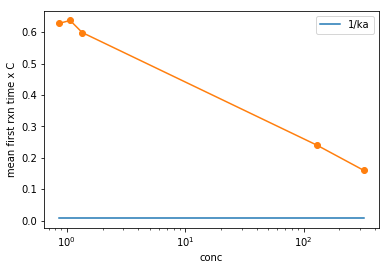

In [10]:
print('kaf',kaf)
rm = 0.005
D = 1
kd= 4.0*math.pi*D
ka = kaf*kd

plt.plot(conc,[1/ka]*len(conc),label='1/ka')
plt.semilogx(conc,rxt*conc,'o-')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.legend()

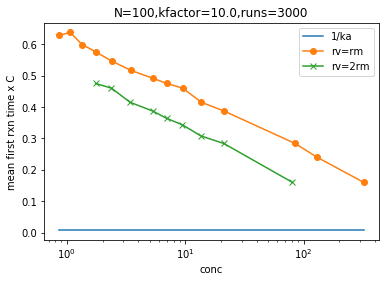

In [11]:
Crm2=np.array([ 1.74932826 , 2.3787775 ,  3.42090859 , 5.33458518  ,6.96301248 , 9.45251059,
 13.58991085 ,21.12914131 ,80.12820513])
rxtrm2=np.array([0.27137338, 0.19333599, 0.12124948, 0.07248272, 0.05222263, 0.03629452,
 0.02262369, 0.01342985 ,0.00199828])
Crm=np.array([ 0.86332525   ,1.06600716   ,1.34652569,1.75864373 , 2.39355846,  3.44642192,  5.36112541,  6.99731303,  9.51510999,
 13.68363437, 21.33834073, 84.51656525,129.73533991 ,320.51282051])
rxtrm=np.array([7.27351210e-01 ,5.97726837e-01 ,4.44661791e-01,0.32699798, 0.22812282, 0.15002535, 0.09155381, 0.06784335, 0.048334,
 0.03031237, 0.01812068, 0.00335746,1.84856909e-03,
 4.99571073e-04])
plt.plot(Crm,[1/ka]*len(Crm),label='1/ka')
plt.semilogx(Crm,rxtrm*Crm,'o-',label='rv=rm')
plt.semilogx(Crm2,rxtrm2*Crm2,'x-',label='rv=2rm')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.savefig("fig2.png",format='png',dpi=900)   

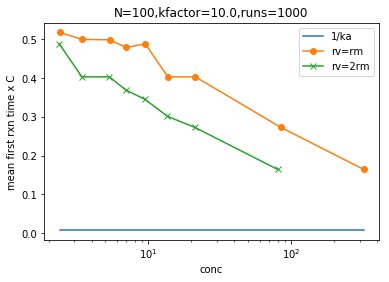

In [8]:
Crm2=np.array([2.3787775 , 3.42090859, 5.33458518, 6.96301248,  9.45251059, 13.58991085, 21.12914131, 80.12820513])
rxtrm2=np.array([0.20523163, 0.11780772, 0.07555227,0.05298156, 0.0365126 , 0.02217074, 0.0129069 , 0.00205343])
Crm=np.array([ 2.394,3.446,5.361, 6.99731303 ,  9.51510999 , 13.68363437,  21.33834073 , 84.51656525,
 320.51282051])
rxtrm=np.array([0.2162,0.145,0.093,0.06843835, 0.05130791, 0.02945193,0.01888807, 0.00322673, 0.00051336])
plt.plot(Crm,[1/ka]*len(Crm),label='1/ka')
plt.semilogx(Crm,rxtrm*Crm,'o-',label='rv=rm')
plt.semilogx(Crm2,rxtrm2*Crm2,'x-',label='rv=2rm')
plt.xlabel('conc')
plt.ylabel('mean first rxn time x C')
plt.title('N=100,kfactor={},runs={}'.format(kaf,simrun))
plt.legend()
plt.savefig("fig2.png",format='png',dpi=900)   